# Objetivo

Este trabalho visa obter insights através dos dados de como está o mercado de Data Science e o que ele esta requerendo. A ideia a priri era obter insights a cerca de salários e skills demandadas, até a coleta dos dados não se tinha com clareza  que tipo de análise exatamente seria feita. Com esse intuito preilimar coletou-se os dados das mais diversas fontes, tais como kaagle, glassdoor, h1bdata e medley. Os links de onde foram baixados os dataset podem ser encontrados abaixo e categorizados segundo uma inspeção preliminar:


<br/>


- Salaries Around World: O conjunto de dados nessa categoria envolve datasets com mesmo esquema. Eles possuem dados sobre o ano de coleta do dado, o tipo a modalidade empregatícia, salários na moeda local, salarios em dolar, proporção de tempo em regime remoto, onde fica sede da compania ,o tamanho da compania e finalmente o local de residência do empregado.

    - *AI/ML Salaries* : https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries 
    - *Data Science Jobs Analysis*: https://www.kaggle.com/datasets/niyalthakkar/data-science-jobs-analysis
    - *Data Jobs 2023*: https://www.kaggle.com/datasets/dinarkhan/data-jobs-2023 
    
    <br/>

 - Jobs Descriptions: Esse conjunto de dados foi coletado visando analisar quais são as skills que mais aparecem nas descrições de vagas de trabalho. Os dataset possuem squemas diferentes, mas ambos foram coletados com o intuito de  somente utilizar a coluna equivalente ao cargo de trabalho e a descrição:

    - *Data Scientist Jobs* - GlassDoor: https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs?datasetId=778775&sortBy=voteCount : Possui o cargo de trabalho ofertado na vaga, aonde a vaga foi postada, a compania que postou a vaga e a descrição do job. 
    
    <br/>

    - *2023 Data Scientists Job Descriptions* : https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions :  Esse dataset é bem mais amplo, além de possuir o título do job e sua descrição ele possui o nnome da compahia, seu lucro, sua avalição na plataforma glassdoor e o setor de atuação daquela compahia.  De fato poderia-se fazer fazer uma análise mais rica com esse dataset, mas por questões de escopo de projeto apenas utilizou-se as columnas relativas ao título do job, a descrição e o setor em que a companhia atua com a finalidade de obter um insight de qual setores estão mais empregando. 
    
    <br/>



- Jobs mapping Skills: Nessa categoria temos o mapeamento de habilidades por job, são listados ao todo  16 habilidades onde um empregado. Cada linha desse dataset equivale a um empregado num determinado posto, que respondeu sua posição em relação a aquela habilidade.

    - *IT Career Proficiency Dataset*: https://data.mendeley.com/datasets/kzt6h7pz97 
    
    <br/>
    

- H1Bdata: Esses dataset foi obtido a partir de uma adpatação de um script de  web scrapping em  "https://github.com/yiuhyuk/ds_salary_h1b/blob/master/h1b_salary.ipynb". O código adpatado pode ser encontrando na classe       ```H1bdataWebScrapper.py``` e sua implementação no script  ```h1bdata_web_scrapping.py``` ambos presensente nesse repositório. Nesse datasset temos  o nome da compania em que está o job, o título do job, o salário em dolar, a data de postagem, a cidade e o estado americano correspondente.


Por fim valem duas observações. 

-> A primeira em relação  aos dataset, os datasets das categorias `Jobs Descriptions`,  `Jobs mapping Skills` e `H1Bdata` correpondem a dados coletados relativo ao território dos EUA, portanto a vasta maioria dos dados aqui coletados diz respeito ao Estados Unidos, pois a vasta maioria dos dados disponíveis gratuitos correspondem ao território dos EUA. Por isso daremos ênfase a ánalise em território americano.

-> A segunda é em relação a implementação do pré-processamento. Durante a pós-graduação de ciência de dados e analytics aprendemos diversos conceitos de engenharia de software e Pogração orientada a objetos. Com o intuito de implementar os conceitos aprendidos nessas disciplinas na prática, implementou-se o pré-processamento segmentado em classes, então utilizaremos  o package  `PreProcessing` para performar as principais tarefas de pre-processamento.

Dadas as devidas descrições, mãos a obra !



# Extração de insights do mercado de trabalho e o que ele está requerendo nos últimos anos

In [1]:
#Setup to run on Colab
"""
from google.colab import drive
import os
import warnings
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Code/')
warnings.filterwarnings('ignore')
"""

"\nfrom google.colab import drive\nimport os\nimport warnings\ndrive.mount('/content/gdrive')\nos.chdir('/content/gdrive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Code/')\nwarnings.filterwarnings('ignore')\n"

In [2]:

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from ComposeData.CsvReader import CsvReader
from Env.Constants import *

warnings.filterwarnings('ignore')



## Merging Dos dados 

Como fora mencionado na descrição os dados relativos a categoria "`Salaries Around world`" possuem o mesmo esquema, exatamente por isso é foi realizado um trabalho de concatenar esse datasets num único dataset claro tendo o cuido de eliminar os duplicados para retirar redudância no dataset resultante da composição. Para isso construi-se a classe `Concatenator` cuja implementação  de concatenação de dados  pode ser vista a seguir: 

In [3]:
#Even it works I doesn't looks weel, I would like to replace that for something more elegant.


from ComposeData.Concatenator import Concatenator
from Env.ProjectPaths import DATASET_PATH


#Instantiate Classes

#Readers

csv_reader1 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/data_science jobs_salaries_world.csv")
csv_reader2 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/data_science_salaries_around_world.csv")
csv_reader3 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/ds.salaries.csv")
csv_reader4 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/salaries.csv")

#Concatenator

Concatenator = Concatenator()


#Load data

df_salaries_around_world1 = csv_reader1.load_data()
df_salaries_around_world2 = csv_reader2.load_data()
df_salaries_around_world3 = csv_reader3.load_data()
df_salaries_around_world4 = csv_reader4.load_data()


#Cocatenate

dfs_salaries_around_world = [df_salaries_around_world1, df_salaries_around_world2, df_salaries_around_world3, df_salaries_around_world4]
salaries_around_world = Concatenator.process_data(data=dfs_salaries_around_world)

#Save on to analyse Output

salaries_around_world.to_csv(DATASET_PATH + "Salaries_around_world/Composed_data/salaries_around_world.csv")

## Avaliação preliminar dos dados

In [4]:
# LoadData
from Env.ProjectPaths import *

salaries_around_world_df = CsvReader(file_path = SALARIES_WORLD_COMPSED_DATASET_PATH).load_data()
h1bdata_df = CsvReader(file_path = H1BDATA_DATASET_PATH).load_data()
job_description_kaggle_df = CsvReader(file_path = KAGGLE_JOB_DESCRIPTIONS_DATASE_PATHT).load_data()
job_description_glassdoor_df = CsvReader( file_path= GLASSDOOR_JOB_DESCRIPTIONS_DATASET_PATH).load_data()
skills_mapping_df = CsvReader( file_path= SKILLS_MAPPING_DATASET_PATH).load_data()



### Salaries Around World

In [5]:
salaries_around_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 1052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2370 non-null   int64 
 1   experience_level    2370 non-null   object
 2   employment_type     2370 non-null   object
 3   job_title           2370 non-null   object
 4   salary              2370 non-null   int64 
 5   salary_currency     2370 non-null   object
 6   salary_in_usd       2370 non-null   int64 
 7   employee_residence  2370 non-null   object
 8   remote_ratio        2370 non-null   int64 
 9   company_location    2370 non-null   object
 10  company_size        2370 non-null   object
dtypes: int64(4), object(7)
memory usage: 222.2+ KB


In [6]:
salaries_around_world['employee_residence'].value_counts()

US    1558
GB     187
IN      89
CA      79
DE      61
      ... 
MD       1
MK       1
BA       1
AM       1
KW       1
Name: employee_residence, Length: 76, dtype: int64

Primeira coisas que percebemos. O dataset não é representativo para todos os países, mesmo concatenando todos os datasets disponíveis. A imensa maioria dos registro correspondem as empregos nos EUA, o dataset se mostra representativo para os 5 primeiros países com mais registros. Então só consideraremos os 5 países com mais registros nesse dataset.

Além disso...

In [7]:
salaries_around_world_df['employment_type'].value_counts()

FT    2331
PT      21
CT       9
FL       9
Name: employment_type, dtype: int64

A imensa maioria do dataset corresponde a  vínculo empregatício FULL time. Logo os outros tipos de vínculos também não são representativos e devem ser eliminados.

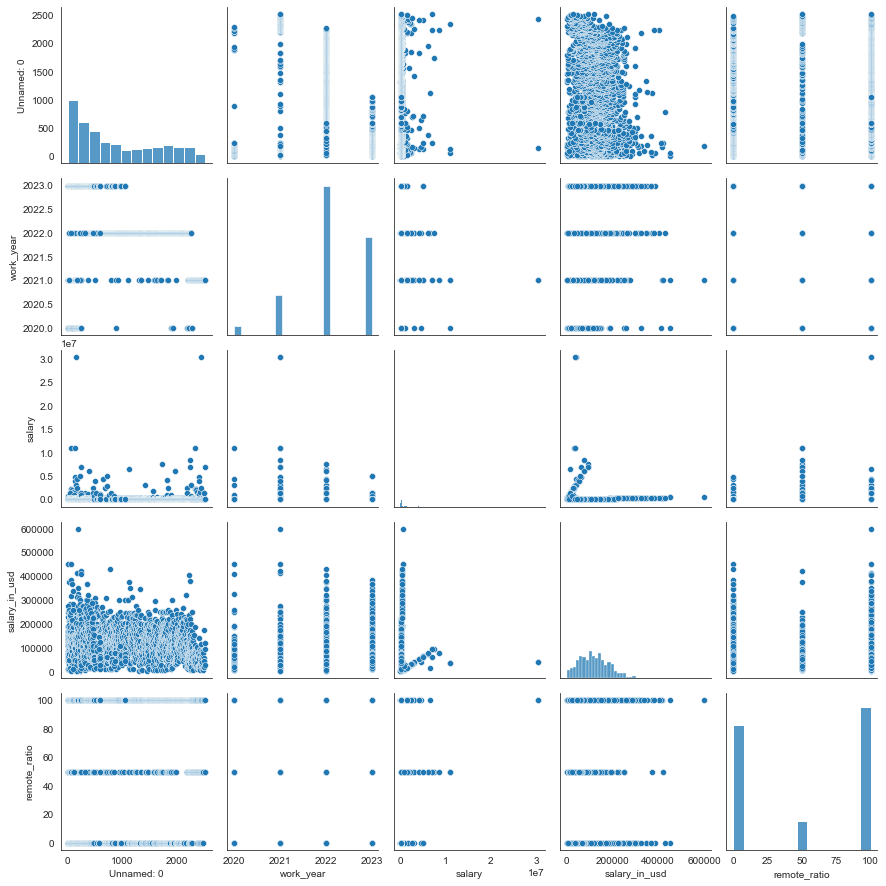

In [8]:
sns.set_style("white")
sns.pairplot(salaries_around_world_df, diag_kind= 'auto' )

Nesse dataset só tem uma variável numérica que nos interessa, que é "salary_in_usd", vamos analisa-la mais a fundo.

<AxesSubplot:ylabel='Density'>

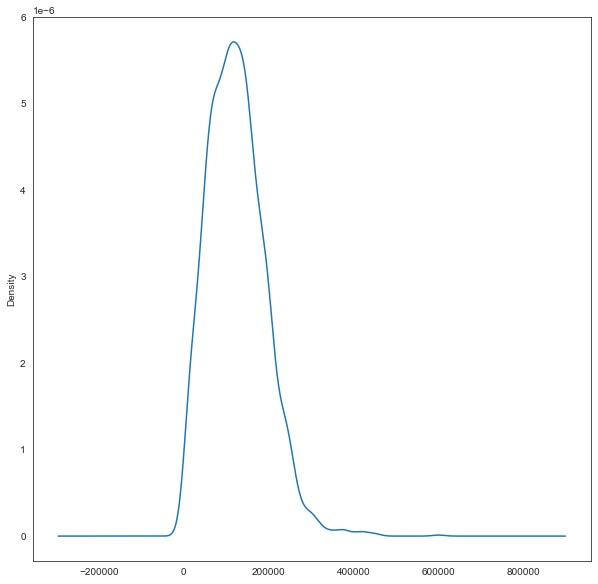

In [9]:
fig = plt.figure( figsize= (10,10))
fig.set_facecolor('white')

salaries_around_world_df['salary_in_usd'].plot(kind='density')


Visualmente  a  variáveil relativa ao salário parece ter distribuição normal. Contudo  esssa distribuição não está refletindo a linha de análise, pois para nossa linha de análise é interessante considerar a distribuição pelo título do job.

<AxesSubplot:>

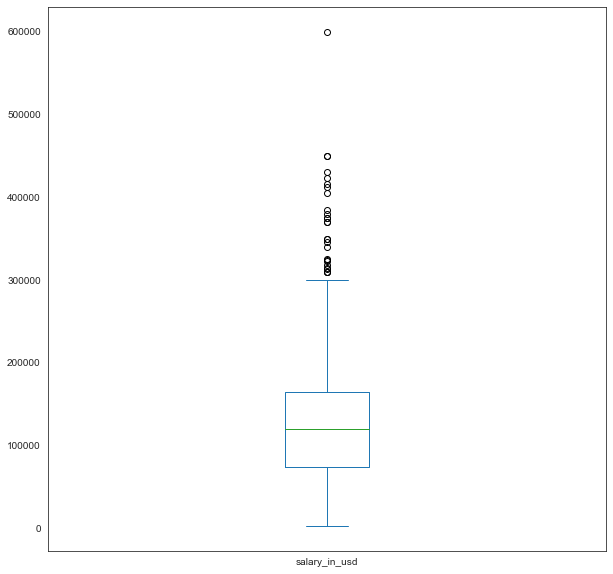

In [10]:
fig = plt.figure( figsize= (10,10))
fig.set_facecolor('white')

salaries_around_world_df['salary_in_usd'].plot(kind='box')

De forma absoluta parece haver alguns outliers, trateremos disso mais adiante.

Contudo havemos de observar um pequeno detalhes:

In [11]:
salaries_around_world_df['salary_in_usd']

0        64369
1        68428
2        85000
3       230000
4       125000
         ...  
2365     37665
2366     75455
2367     63285
2368     58417
2369     46246
Name: salary_in_usd, Length: 2370, dtype: int64

A coluna salarios está em int64, é interessante que essa coluna seja um float por representar um valor monetário.

Analise  dos títulos de jobs

In [12]:
salaries_around_world_df['job_title'].unique()

array(['Data Science Consultant', 'Data Scientist',
       'Head of Data Science', 'Head of Data',
       'Machine Learning Engineer', 'Data Analytics Manager',
       'Research Scientist', 'Data Analyst', 'Data Engineer',
       'Data Science Engineer', 'Manager Data Science',
       'Data Engineering Manager', 'AI Scientist',
       '3D Computer Vision Researcher', 'ML Engineer',
       'Applied Data Scientist', 'Director of Data Science',
       'Data Analytics Engineer', 'Lead Data Analyst', 'BI Data Analyst',
       'Machine Learning Scientist',
       'Machine Learning Infrastructure Engineer',
       'Marketing Data Analyst', 'Lead Data Engineer',
       'Director of Data Engineering',
       'Computer Vision Software Engineer', 'Financial Data Analyst',
       'Cloud Data Engineer', 'Principal Data Analyst',
       'Big Data Architect', 'Lead Data Scientist', 'Data Architect',
       'Big Data Engineer', 'Staff Data Scientist',
       'Data Science Manager', 'Business Data Anal

Como podemos ver temos muitos títulos para trabalhos, muitos deles podem ser simplificados, então temos uma primeira tarefas simplificar os postos de trabalho nesse dataset.
Mas essa não é a única subsituição a fazer, note que outra colunas também devem passar por esse tipo de transformação afim de fazer com a informação contida nela fique mais clara:



In [13]:
salaries_around_world_df[['experience_level','employee_residence','company_location', 'company_size']].head(10)

,experience_level,employee_residence,company_location,company_size
0,EN,DE,DE,L
1,SE,GR,US,L
2,EX,RU,RU,M
3,EX,RU,RU,L
4,EN,US,US,S
5,SE,US,US,M
6,MI,US,US,M
7,MI,FR,FR,L
8,MI,AT,AT,L
9,SE,CA,CA,L


Sendo assim outro pre-processamento a se fazer é realizar substituições nessas colunas com a finalidade de torna-la mais claras e explícitas.

Tendo preliminarmente  analisado esse dataset temos então listados todo o pré-processamento que será feito a priori. Assim sendo vamos realizar-lo

In [14]:
import subprocess

subprocess.run(['python', 'setup.py'], capture_output=True, text=True)


CompletedProcess(args=['python', 'setup.py'], returncode=1, stdout='', stderr='usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]\n   or: setup.py --help [cmd1 cmd2 ...]\n   or: setup.py --help-commands\n   or: setup.py cmd --help\n\nerror: no commands supplied\n')

In [15]:
from Preprocessing.TransformData.DataReplacer import  DataReplacer
from Preprocessing.CleanData.DataFilter import DataFilter
from Preprocessing.TransformData.DataTypeConversor import DataTypeConversor
from Preprocessing.PreProcessing import PreProcessing


In [16]:
#Salaries around world preprocessing

#Replacing if contains






jobs = ["ANALYST", "DATA ENGINEER", "DATA SCIENTIST", "MACHINE LEARNING ENGINEER", "ARCHITECT", "DATA SCIENCE", "DATA ANALYTICS"]
salaries_world_replacing_if_contains = DataReplacer(task="IFCONTAINSREPLACNING", on_col='job_title', values=jobs)


# map replace

map = {
    "ANALYST": "DATA ANALYST",
    "DATA ANALYTICS": "DATA ANALYST",
    "DATA SCIENCE": "DATA SCIENTIST",
    "ANALYTICS ENGINEER": "DATA ANALYST",
    "ETL DEVELOPER": "DATA ENGINEER",
    "ARCHITECT" : "DATA ARCHITECT",
    "COMPUTER VISION ENGINEER":"MACHINE LEARNING ENGINEER",
    "DEEP LEARNING ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING INFRASTRUCTURE ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING SOFTWARE ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING DEVELOPER": "MACHINE LEARNING ENGINEER",
    "COMPUTER VISION SOFTWARE ENGINEER": "MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING MANAGER": "MACHINE LEARNING ENGINEER",
    "HEAD OF MACHINE LEARNING" : "MACHINE LEARNING ENGINEER",
    "ML ENGINEER":"MACHINE LEARNING ENGINEER",
    "MLOPS ENGINEER":"MACHINE LEARNING ENGINEER",
    "NLP ENGINEER":"MACHINE LEARNING ENGINEER",
    "AI DEVELOPER": "MACHINE LEARNING ENGINEER",
    "AI SCIENTIST":"RESEACHER",
    "APPLIED SCIENTIST":"RESEACHER",
    "APPLIED MACHINE LEARNING SCIENTIST":"RESEACHER",
    "3D COMPUTER VISION RESEARCHER":"RESEACHER",
    "DEEP LEARNING RESEARCHER":"RESEACHER",
    "MACHINE LEARNING RESEARCH ENGINEER":"RESEACHER",
    "MACHINE LEARNING RESEARCHER":"RESEACHER",
    "RESEARCH ENGINEER":"RESEACHER",
    "RESEARCH SCIENTIST":"RESEACHER",
    "MACHINE LEARNING SCIENTIST": "RESEACHER",
    "HEAD OF DATA": "CHIEF DATA OFFICER",
    "CLOUD DATABASE ENGINEER":"DATABASE ENGINEER"
    
}


salaries_world_map_replacing_jobs = DataReplacer(task="MAPREPLACING", on_col='job_title', map=map)

#filter non-full time

salaries_world_filter_no_fulltime = DataFilter(filter_by="FILTER_NOT_EQUAL_VALUE",  col="employment_type", by_value="FT")

# map replace contry abrevitations

map = CsvReader(file_path=DATASET_PATH + "Salaries_around_world/maps/countries_map.csv").load_data()
map = dict(map.values)
salaries_world_map_replace_contries_abv_er = DataReplacer(task="MAPREPLACING", on_col='employee_residence', map=map)
salaries_world_map_replace_contries_abv_cl = DataReplacer(task="MAPREPLACING", on_col='company_location', map=map)


#map replace expirience level
map={
    "EN": "ENTRY-LEVEL",
    "EX": "EXPIRIENCED",
    "MI": "MID-LEVEL",
    "SE": "SENIOR-LEVEL"
}
salaries_world_map_replace_experience_level =  DataReplacer(task = "MAPREPLACING", on_col='experience_level', map=map)


#map replace company_size
map={
    "L": "LARGE-SIZE",
    "M": "MEDIUM-SIZE",
    "S": "SMALL-SIZE",
}
salaries_world_map_replace_company_size =  DataReplacer(task = "MAPREPLACING", on_col='company_size', map=map)
# filter job_titles less freq than 4

salaries_world_filter_less_freq = DataFilter(filter_by="FREQ_LOWER_THAN_VALUE", col='job_title', by_value= 4)


#convert salaries to float

salaries_world_convert_salaries_usd_float = DataTypeConversor(to_type="TO_FLOAT", col="salary_in_usd")



#Salaries Around world prepropcessing
print("**************************************************************")
print("Iniciating Pre-Processing on salaries__around_worl\n")

salaries_world_preprocessors = [ 
                                salaries_world_replacing_if_contains, salaries_world_map_replacing_jobs, salaries_world_map_replace_experience_level, salaries_world_filter_no_fulltime, \
                                salaries_world_map_replace_contries_abv_er, salaries_world_map_replace_contries_abv_cl, \
                                salaries_world_map_replace_company_size, salaries_world_filter_less_freq,
                                salaries_world_convert_salaries_usd_float
                                
                            ]
salaries_world_preprocessing =  PreProcessing( pre_processors= salaries_world_preprocessors)
salaries_world_around_df_preprocessed = salaries_world_preprocessing.process_data(salaries_around_world)
print("salaries__around_worl Preprocessing Completed Sucessfully. ")
print("************************************************************** \n")

**************************************************************
Iniciating Pre-Processing on salaries__around_worl

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 

Perform Data conversion... 
Data conversion DONE !

salaries__around_worl Preprocessing Completed Sucessfully. 
************************************************************** 



Vamos então checar o novo arquivo:

In [17]:
salaries_world_around_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 1052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2325 non-null   int64  
 1   experience_level    2325 non-null   object 
 2   employment_type     2325 non-null   object 
 3   job_title           2325 non-null   object 
 4   salary              2325 non-null   int64  
 5   salary_currency     2325 non-null   object 
 6   salary_in_usd       2325 non-null   float64
 7   employee_residence  2325 non-null   object 
 8   remote_ratio        2325 non-null   int64  
 9   company_location    2325 non-null   object 
 10  company_size        2325 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 218.0+ KB


Se os países são os top 5 mais frequentes:

In [18]:
salaries_world_around_df_preprocessed['employee_residence'].value_counts()

UNITED STATES OF AMERICA    1549
UNITED KINGDOM               187
INDIA                         84
CANADA                        78
GERMANY                       58
                            ... 
BULGARIA                       1
CHINA                          1
IRAN                           1
NEW ZEALAND                    1
KUWAIT                         1
Name: employee_residence, Length: 73, dtype: int64

Queremos somente os 5 mais frequentes:

In [19]:
#filter top 5 most frequent countries
country_freq_threshold= salaries_world_around_df_preprocessed['employee_residence'].value_counts()[4]

salaries_world_filter_top_5_most_freq =  DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value=country_freq_threshold, col='employee_residence')
salaries_world_around_df_preprocessed = salaries_world_filter_top_5_most_freq.process_data(salaries_world_around_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [20]:
salaries_world_around_df_preprocessed['employee_residence'].value_counts()

UNITED STATES OF AMERICA    1549
UNITED KINGDOM               187
INDIA                         84
CANADA                        78
GERMANY                       58
Name: employee_residence, dtype: int64

como mencionado anteriomente é mais interessante olhar para os dados de salários por categorias, como fizemos a simplificação dos títulos dos jobs então conseguimos analisar a faixa de salários por categoria

In [21]:
salaries_world_around_df_preprocessed['job_title'].value_counts()

DATA SCIENTIST                  543
DATA ENGINEER                   498
DATA ANALYST                    442
MACHINE LEARNING ENGINEER       236
RESEACHER                       129
DATA ARCHITECT                   55
DATA MANAGER                     16
BI DEVELOPER                     11
DATA SPECIALIST                   9
DATA OPERATIONS ENGINEER          6
DATABASE ENGINEER                 4
DATA INFRASTRUCTURE ENGINEER      4
CHIEF DATA OFFICER                3
Name: job_title, dtype: int64

Apesar da simplificação realizada, percebemos temos quantidade não significativa para determinados títulos de jobs, nesse caso vamos pegar  o top 6 mais frequente

In [22]:
freq_job_title_treshold = salaries_world_around_df_preprocessed['job_title'].value_counts()[5]

filter_less_freq_job_titles = DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value= freq_job_title_treshold , col='job_title')
salaries_world_around_df_preprocessed = filter_less_freq_job_titles.process_data(salaries_world_around_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [23]:
salaries_world_around_df_preprocessed['job_title'].value_counts()

DATA SCIENTIST               543
DATA ENGINEER                498
DATA ANALYST                 442
MACHINE LEARNING ENGINEER    236
RESEACHER                    129
DATA ARCHITECT                55
Name: job_title, dtype: int64

ok, agora podemos olhar para os salarios por categoria

Text(0, 0.5, 'Salary in USD')

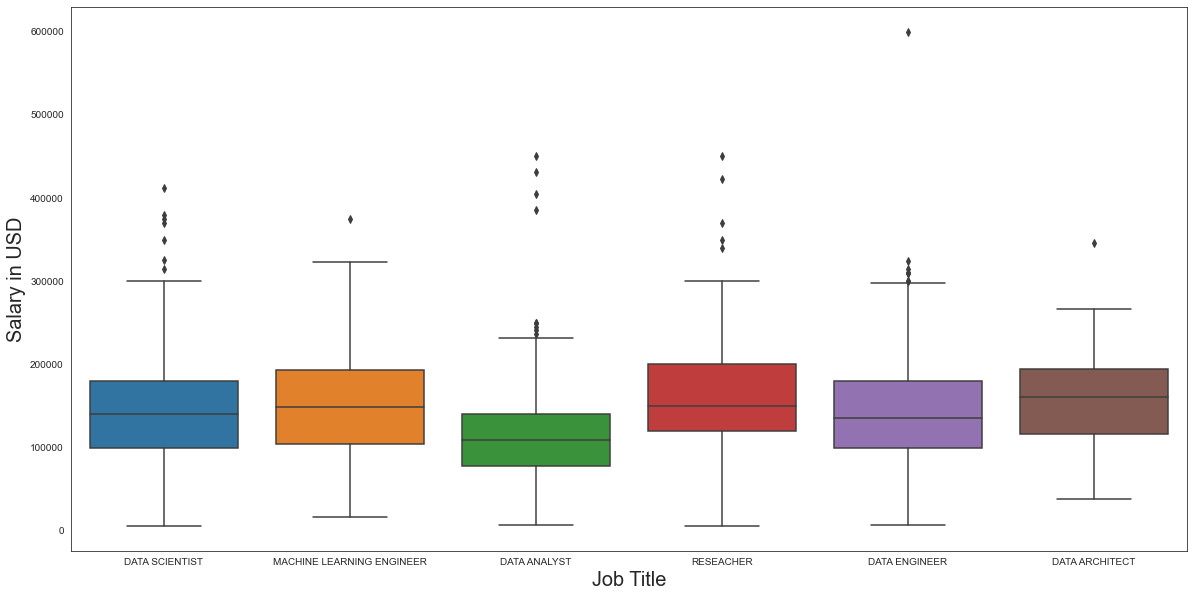

In [24]:

fig = plt.figure(figsize=(20,10))
sns.boxplot(x='job_title', y='salary_in_usd', data=salaries_world_around_df_preprocessed)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel("Salary in USD", fontsize=20)

vamos olhar mais detalhamdamente a distribuição de salarios por categorias

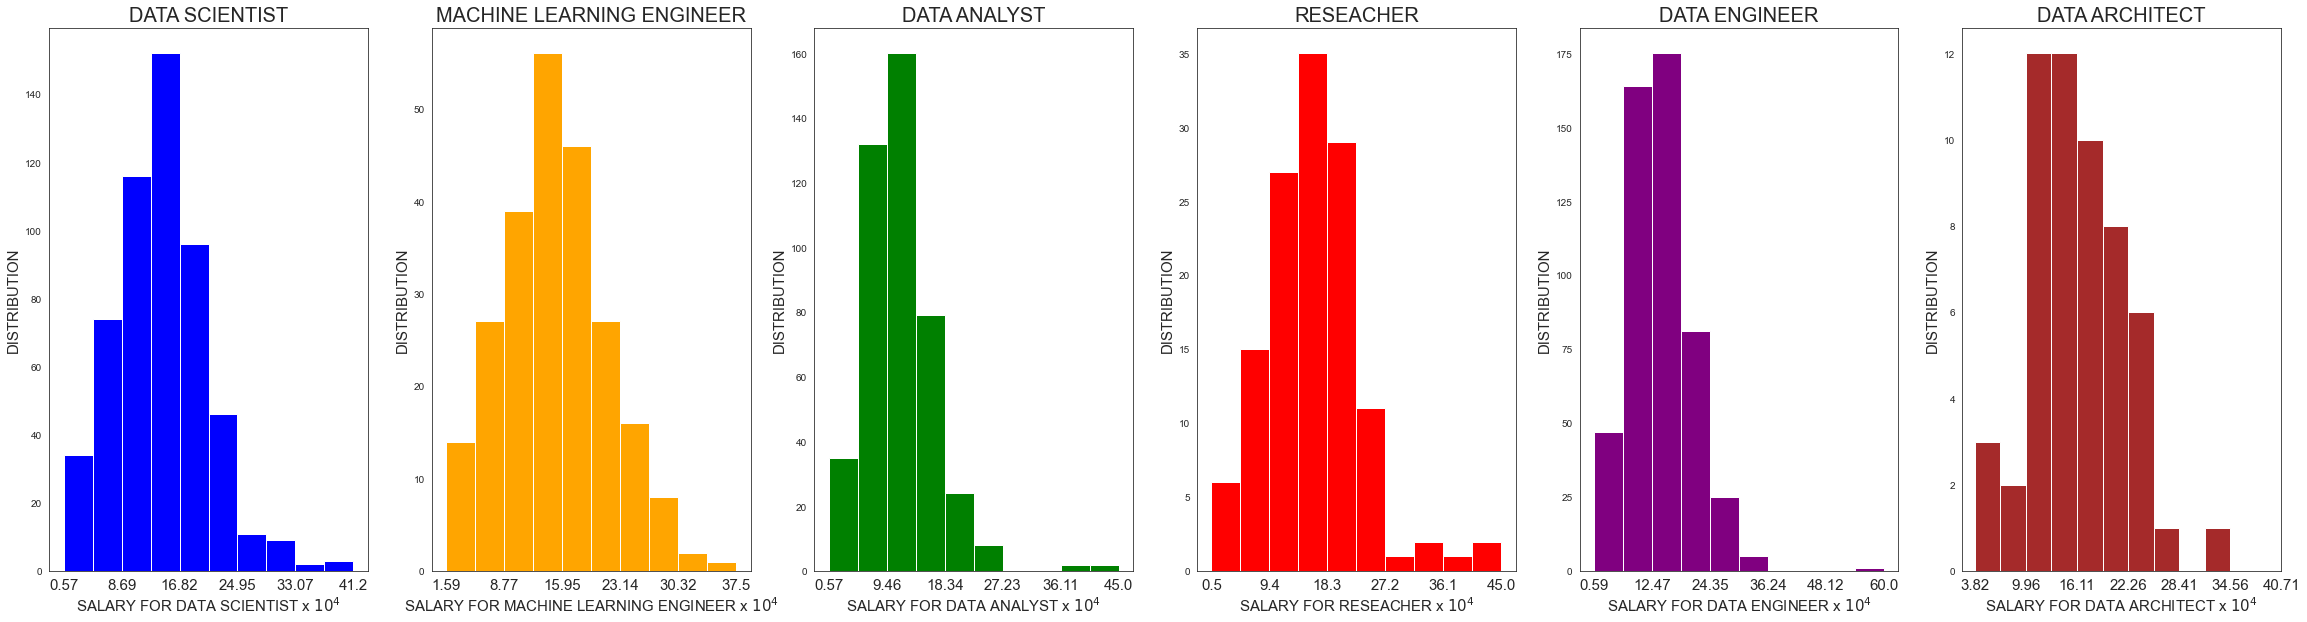

In [25]:
import numpy as np
from Env.Constants import JOB_COLORS

jobs = salaries_world_around_df_preprocessed['job_title'].unique()
fig,axs = plt.subplots(1, len(jobs), figsize=(40,10))
for job, i in zip(jobs, range(0, len(jobs))):
    
    #set ticks
    n_ticks= 5
    power=4
    scaling= 10**power
    
    job_roles_salaries = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd'] / scaling
    min_sal = (job_roles_salaries.min()) 
    max_sal = job_roles_salaries.max()
    
    job_roles_salaries.plot(kind='hist', ax=axs[i], color=JOB_COLORS[i])
   
    step = (max_sal - min_sal )/ n_ticks
    range_sal =  [round(el,2) for el in np.arange(min_sal , max_sal + step, step) ] 

    
    #set ticks
    axs[i].set_xticks(range_sal)
    axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=15)
    axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
    axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
    axs[i].set_title(f"{job}", fontsize=20)
    
    
    

    
    

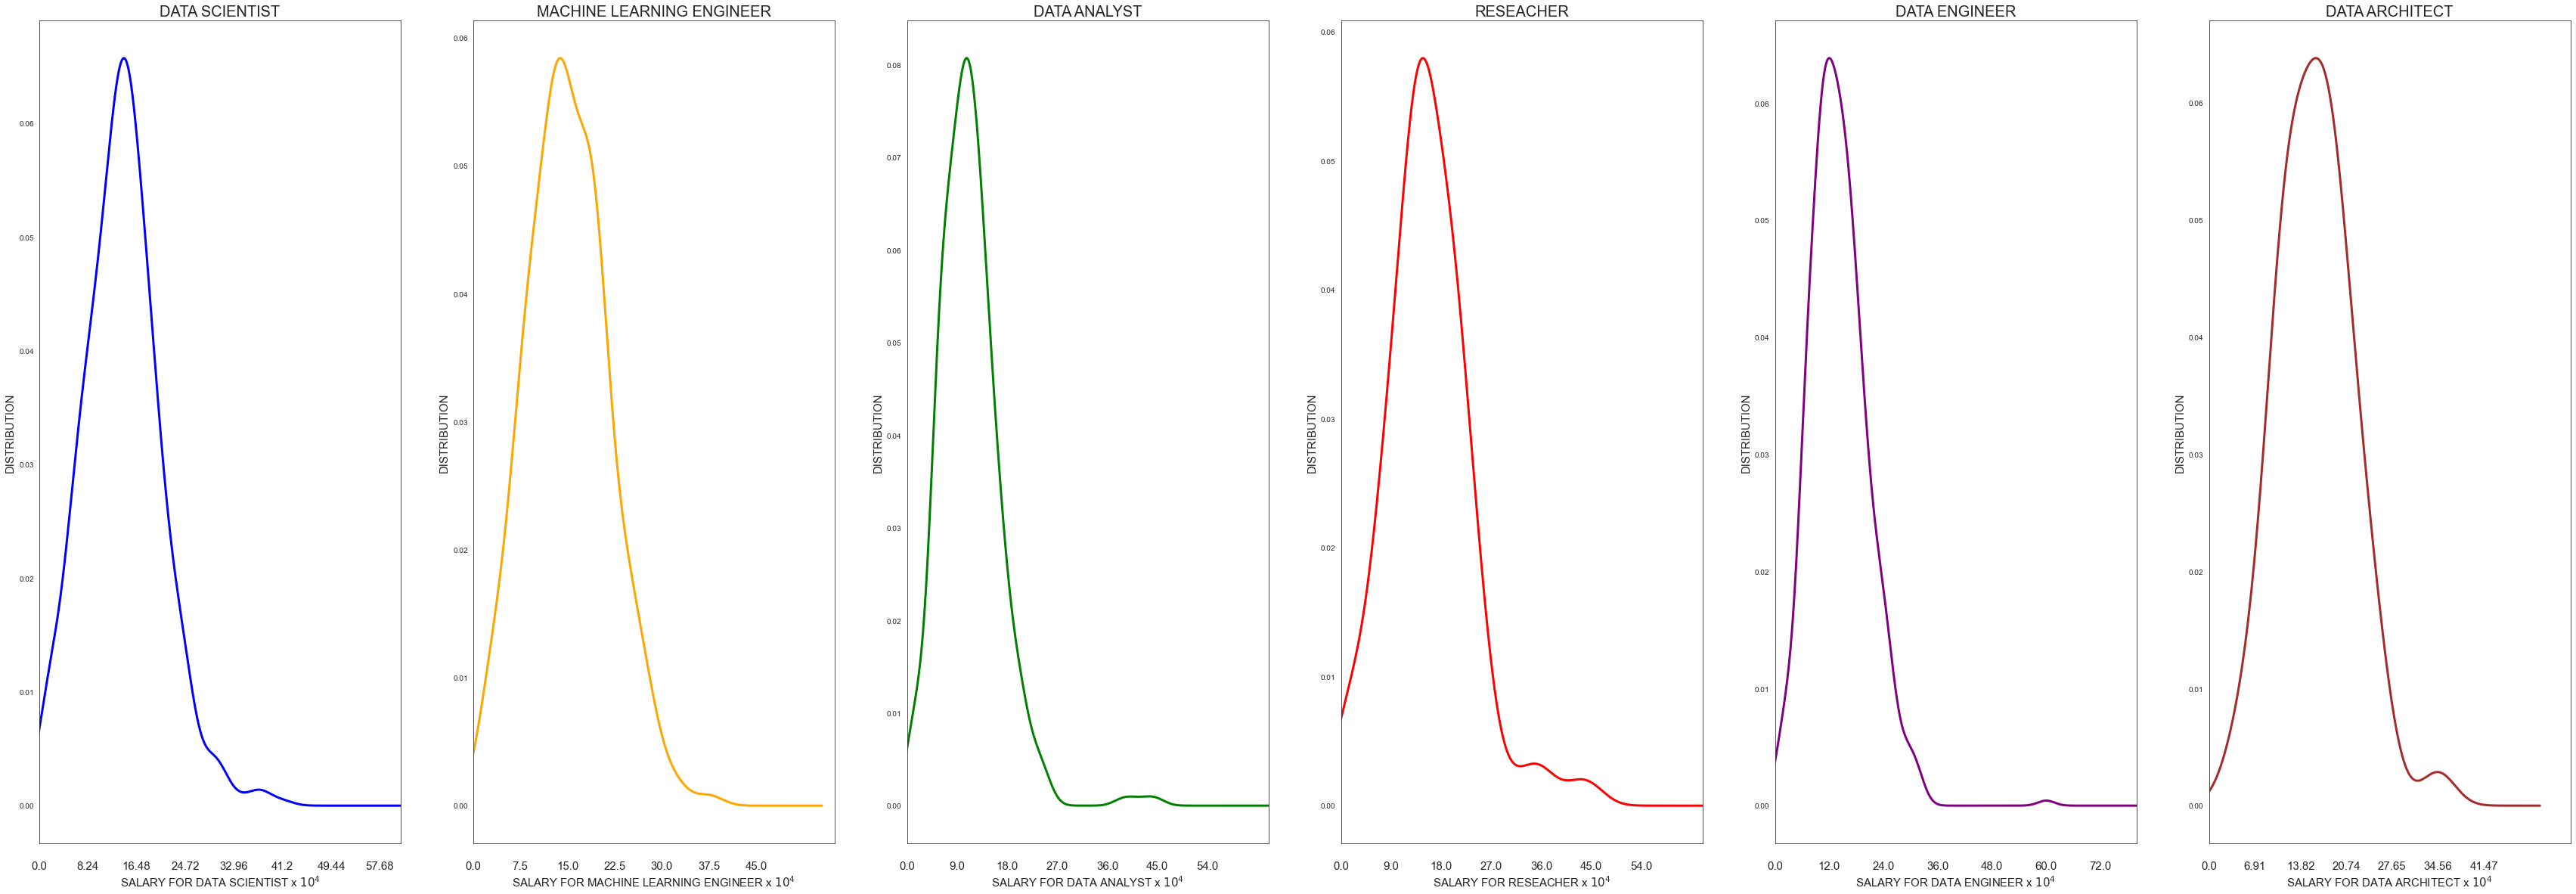

In [26]:


jobs = salaries_world_around_df_preprocessed['job_title'].unique()
fig,axs = plt.subplots(1, len(jobs), figsize=(60,20))

for job, i in zip(jobs, range(0, len(jobs))):
    
    #set ticks
    labels = 6
    n_ticks =  labels - 1
    power=4
    scaling= 10**power
    
    job_roles_salaries = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd'] / scaling
    min_sal = 0
    max_sal = job_roles_salaries.max()
    
    job_roles_salaries.plot(kind='density', ax=axs[i], color=JOB_COLORS[i], linewidth = 3)
   
    step = (max_sal - min_sal )/ n_ticks
    range_sal =  [round(el,2) for el in np.arange(min_sal  , max_sal + 2*step, step) ] 

    
    #set ticks
    offset= 20
    axs[i].set_xticks(range_sal)
    axs[i].tick_params(axis='x', which='major', pad=20)
    axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=15)
    axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
    axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
    axs[i].set_title(f"{job}", fontsize=20)
    axs[i].set_xlim([0, max_sal + offset])


Pelo que se pode observar nenhum deles visualmente demonstra uma distribuição normal, vamo então verificar isso numéricamente, para isso vamos usar o teste de Kolmogorov–Smirnov

In [27]:
from scipy.stats import kstest



for job in salaries_world_around_df_preprocessed['job_title'].unique():
    stat, p = kstest( salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd'], 'norm')
    alpha = 0.05
    
    if p > alpha:
        print(f"Os salarios para {job} SEGUEM uma distruição normal")
    else:
        print(f"Os salarios para {job} NÃO SEGUEM uma distruição normal")
    

Os salarios para DATA SCIENTIST NÃO SEGUEM uma distruição normal
Os salarios para MACHINE LEARNING ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ANALYST NÃO SEGUEM uma distruição normal
Os salarios para RESEACHER NÃO SEGUEM uma distruição normal
Os salarios para DATA ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ARCHITECT NÃO SEGUEM uma distruição normal


Segundo esse teste nenhuma dos salários seguem uma distribuição normal, sendo assim utilizaremos o IRQ como filtro de outliers

vamos tentar filtrar a variavel "salary_in_usd" de forma global, ou seja sem categorizações:

In [28]:
salaries_world_around_df_preprocessed['salary_in_usd']

0        64369.0
4       125000.0
5       120000.0
6       450000.0
9       127543.0
          ...   
962      67240.0
1047     75455.0
1048     63285.0
1051     58417.0
1052     46246.0
Name: salary_in_usd, Length: 1903, dtype: float64

Performing Data Filtering... 
Data Filtering DONE ! 



Text(0, 0.5, 'Salary in USD')

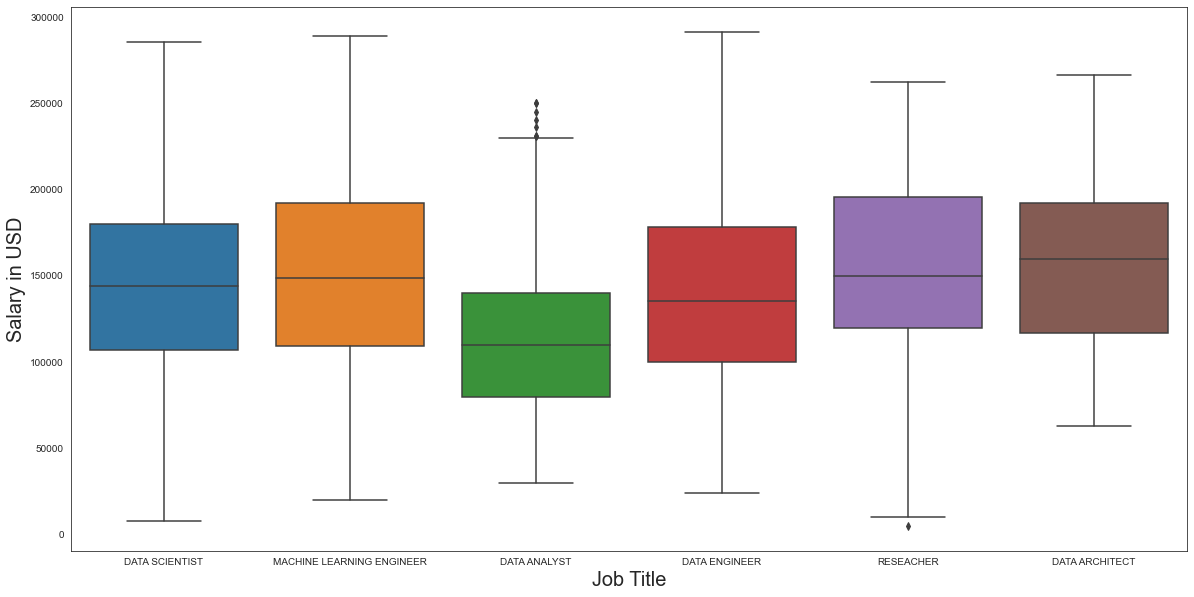

In [29]:
from Preprocessing.CleanData.DataFilter import  DataFilter
test_df = DataFilter(filter_by = "FILTER_OUTLIERS_BY_IQR",col ='salary_in_usd').process_data(salaries_world_around_df_preprocessed)


fig = plt.figure(figsize=(20,10))
sns.boxplot(x='job_title', y='salary_in_usd', data = test_df)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel("Salary in USD", fontsize=20)


Performou bem para boa parte das categorias, porém 2 categorias em específico ficaram com mais outliers, talvez sejam mais interessante filtrar por categoria

Performing Data Filtering... 
Data Filtering DONE ! 



Text(0, 0.5, 'Salary in USD')

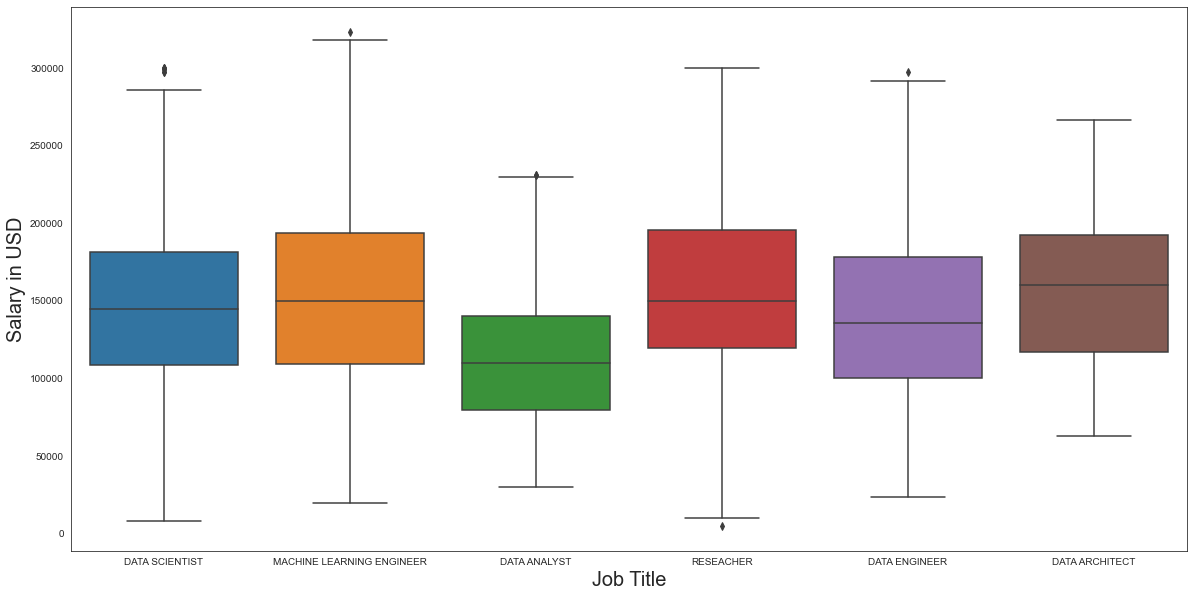

In [30]:


test_df = DataFilter( filter_by="FILTER_OUTLIERS_CATEGORICALLY_BY_IRQ", col='salary_in_usd', category_col='job_title').process_data(salaries_world_around_df_preprocessed)

fig = plt.figure(figsize=(20,10))
sns.boxplot(x='job_title', y='salary_in_usd', data = test_df)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel("Salary in USD", fontsize=20)

Dessa forma o desempenho foi melhor, sendo assim vamos ficar com a filtragem de outlier por categoria

In [31]:
salaries_world_around_df_preprocessed = test_df

In [32]:
salaries_world_around_df_preprocessed

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,ENTRY-LEVEL,FT,DATA SCIENTIST,54000,EUR,64369.0,GERMANY,50,GERMANY,LARGE-SIZE
9,2021,SENIOR-LEVEL,FT,DATA SCIENTIST,159500,CAD,127543.0,CANADA,50,CANADA,LARGE-SIZE
10,2021,SENIOR-LEVEL,FT,DATA SCIENTIST,144000,USD,144000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,LARGE-SIZE
12,2021,MID-LEVEL,FT,DATA SCIENTIST,95000,CAD,75966.0,CANADA,100,CANADA,LARGE-SIZE
13,2021,MID-LEVEL,FT,DATA SCIENTIST,150000,USD,150000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
...,...,...,...,...,...,...,...,...,...,...,...
389,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,120000,USD,120000.0,UNITED STATES OF AMERICA,0,UNITED STATES OF AMERICA,MEDIUM-SIZE
446,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,198000,USD,198000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
447,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,114000,USD,114000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
469,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,160000,USD,160000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE


A etapa de verificação para  "Salaries Around World" foi concluida, agora vamos a verificação do dataset extraido do H1BData

### H1BData

Vamos então a verificação preliminar

In [33]:
h1bdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82431 entries, 0 to 82430
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82431 non-null  int64 
 1   company     82430 non-null  object
 2   title       82396 non-null  object
 3   salary      82396 non-null  object
 4   location    82396 non-null  object
 5   date        82396 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.8+ MB


In [34]:
#Eliminação coluna indesejada
h1bdata_df = h1bdata_df.iloc[:,1:]
h1bdata_df

,company,title,salary,location,date
0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,"45,980","ORLANDO, FL",04/09/2020
1,PERCOLATA CORPORATION,DATA SCIENTIST,"46,060","PALO ALTO, CA",03/18/2016
2,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015
3,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015
4,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,"50,000","JOHNS CREEK, GA",03/16/2017
...,...,...,...,...,...
82426,GOOGLE LLC,STATISTICIAN,"183,000","MOUNTAIN VIEW, CA",01/29/2019
82427,ERNST & YOUNG US LLP,STATISTICIAN,"200,476","NEW YORK, NY",03/21/2022
82428,ERNST & YOUNG US LLP,STATISTICIAN,"200,476","WESTBURY, NY",03/21/2022
82429,AEM-USA FOUNDATION,STATISTICIAN,"216,000","DALLAS, TX",03/08/2016


Como pudemos ver algumas linhas tem valores nullos, vamos olhar um pouco mais a fundo para ver como essas linhas estão

In [35]:
h1bdata_df[h1bdata_df.isna().any( axis = 1)]




,company,title,salary,location,date
10,\n \n,NaN,NaN,NaN,NaN
40,\n\n\n\n\n,NaN,NaN,NaN,NaN
81,\n\n\n\n\n,NaN,NaN,NaN,NaN
122,\n\n\n\n\n,NaN,NaN,NaN,NaN
163,\n\n\n\n\n,NaN,NaN,NaN,NaN
16968,\n \n,NaN,NaN,NaN,NaN
16998,\n\n\n\n\n,NaN,NaN,NaN,NaN
17039,\n\n\n\n\n,NaN,NaN,NaN,NaN
17080,\n\n\n\n\n,NaN,NaN,NaN,NaN
17121,\n\n\n\n\n,NaN,NaN,NaN,NaN


Como visto acima, basta então eliminar todas as linhas que valor NaN em algumas das variáveis do dataset, assim eliminamos todas as linhas em branco.

In [36]:
from Preprocessing.CleanData.MissingDataHandler import MissingDataHandler


h1_bdata_blank_lines_cleaner = MissingDataHandler(handling_by = "CLEAN_BLANK_LINES")
h1bdata_df_preprocessed = h1_bdata_blank_lines_cleaner.process_data(h1bdata_df)
h1bdata_df_preprocessed.info()

Performing missing values elimination... 
missing values elimination DONE !

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82395 entries, 0 to 82430
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   company   82395 non-null  object
 1   title     82395 non-null  object
 2   salary    82395 non-null  object
 3   location  82395 non-null  object
 4   date      82395 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [37]:
sum(h1bdata_df_preprocessed.isna().any())

0

Todas as linhas em branco foram eliminadas ! Por seguinte passemos a análise de distribuição da variável correspondete aos salários por  título de trabalho, mas antes precisamos converter essa coluna para o tipo float

In [38]:
h1bdata_df_preprocessed['salary']

0         45,980
1         46,060
2         47,960
3         47,960
4         50,000
          ...   
82426    183,000
82427    200,476
82428    200,476
82429    216,000
82430    225,000
Name: salary, Length: 82395, dtype: object

precisamos nos livrar dessa vírgula e  converter essa coluna para float

In [39]:
h1_bdata_comma_replacer = DataReplacer(task = "CHARREPLACING", on_col = "salary", this = ",", by = "")
h1_bdata_convert_salaries_to_float = DataTypeConversor(to_type='TO_FLOAT', col='salary')
h1bdata_df_preprocessed = PreProcessing( pre_processors=[h1_bdata_comma_replacer,  h1_bdata_convert_salaries_to_float]).process_data(h1bdata_df_preprocessed)
h1bdata_df_preprocessed['salary']

Performing Data Replacement... 
Data Replacement DONE !

Perform Data conversion... 
Data conversion DONE !



0         45980.0
1         46060.0
2         47960.0
3         47960.0
4         50000.0
           ...   
82426    183000.0
82427    200476.0
82428    200476.0
82429    216000.0
82430    225000.0
Name: salary, Length: 82395, dtype: float64

perfeito, agora podemos fazer uma análise de distribuição dessa variável.

(0.0, 250000.0)

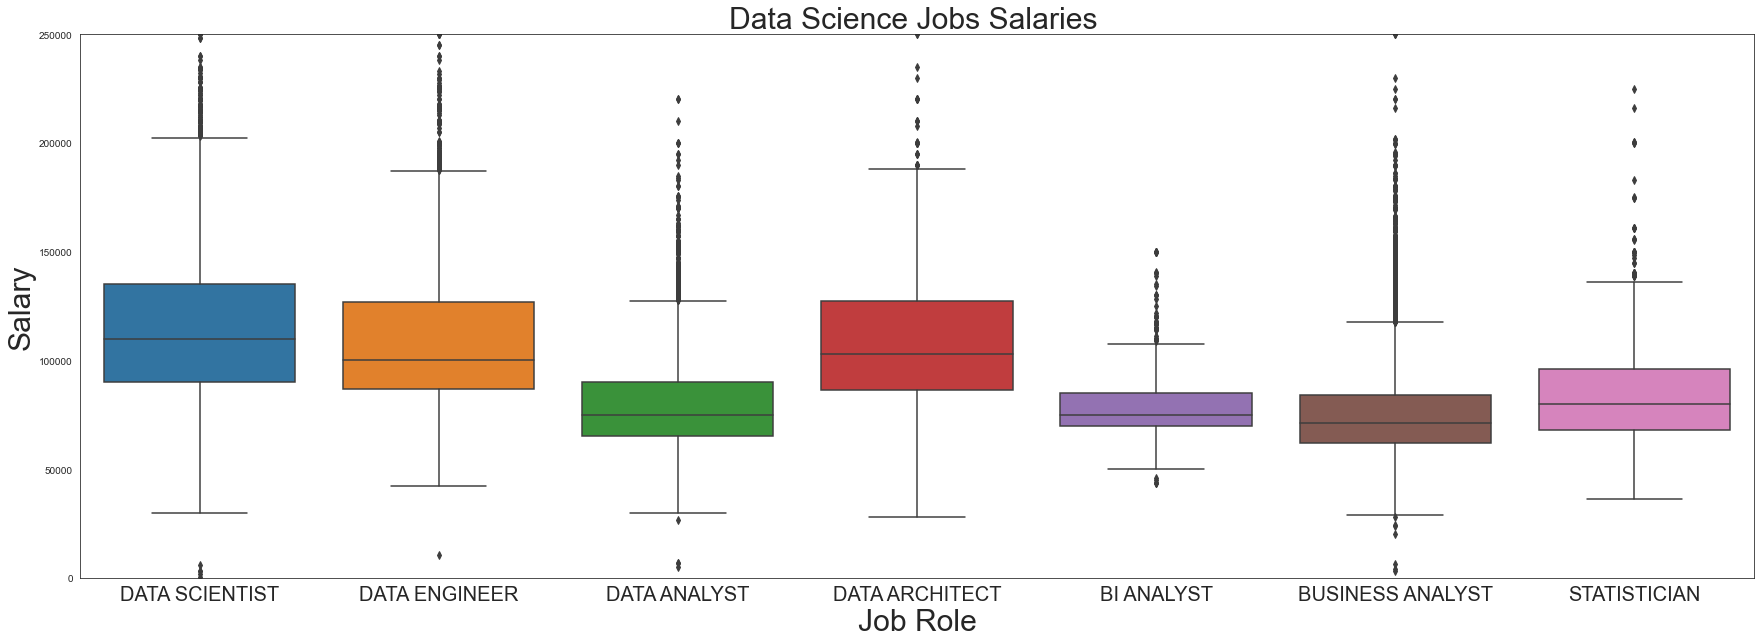

In [40]:
plt.figure(figsize=(30,10))
sns.boxplot(data=h1bdata_df_preprocessed, y="salary",x='title')
sns.set_style('white')
plt.title("Data Science Jobs Salaries ", fontsize=30)
plt.ylabel("Salary", fontsize=30)
plt.xlabel("Job Role", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks()
plt.ylim([0,2.5e5])

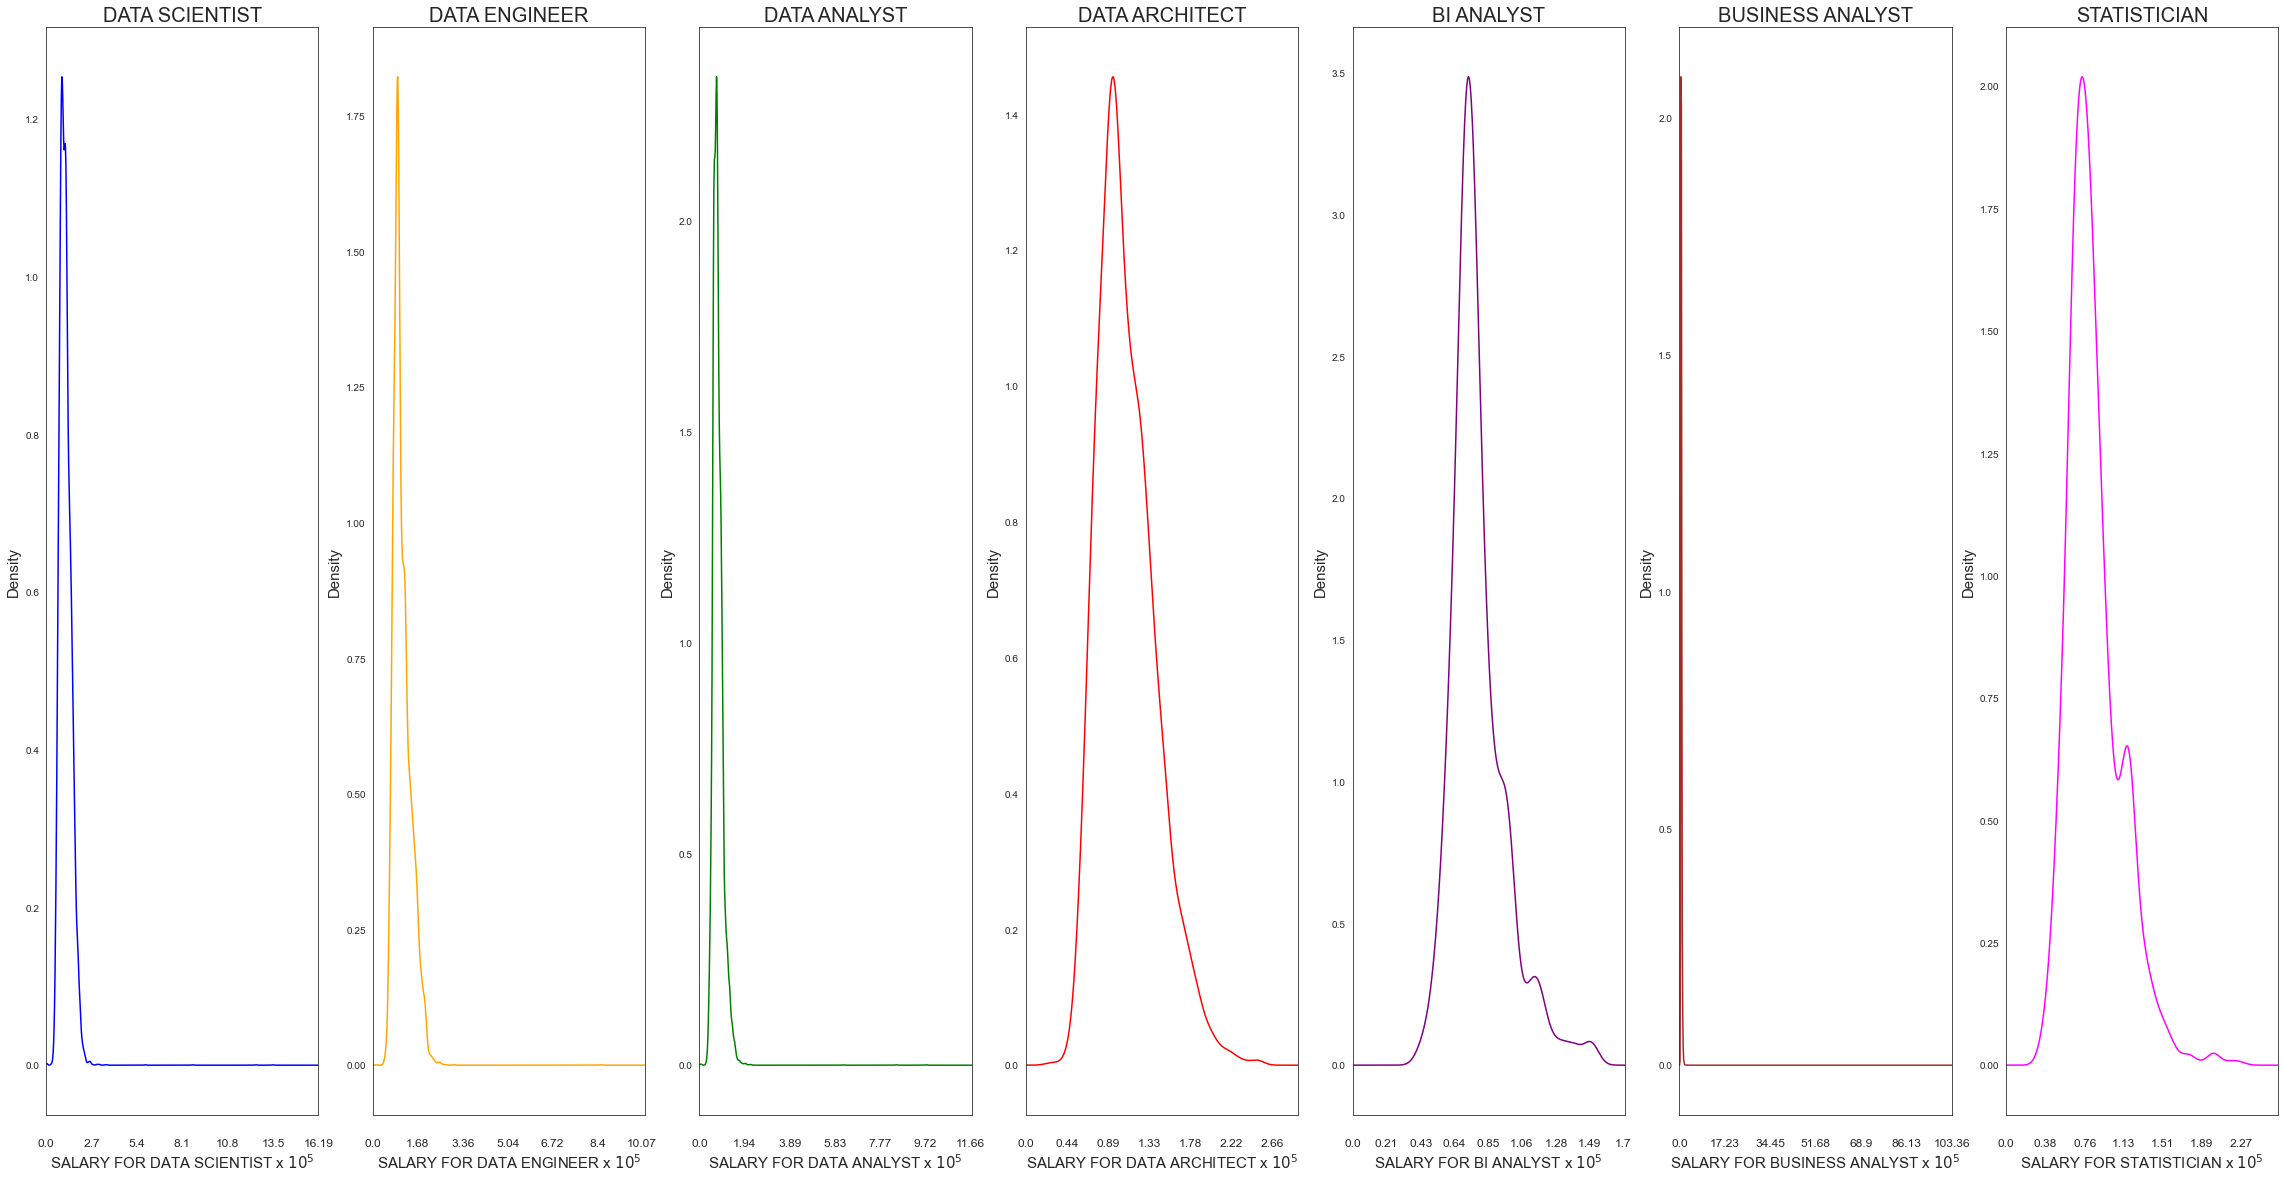

In [41]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(40,20))
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  

  
  n_ticks= 5
  power=5
  scaling= 10**power
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']/ scaling
  
  
  
  
 
  
  max_sal=  salaries.max()
  min_sal = salaries.min()
  step = (max_sal - min_sal )/ n_ticks
  range_sal =  [round(el,2) for el in np.arange(0 , max_sal + step, step) ] 
  
  #set title
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
  
  
  #set ticks
  

  axs[i].set_xlim([0, max_sal])
  axs[i].set_xticks(range_sal)
  axs[i].tick_params(axis='x', which='major', pad=20)
  axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=12)
  axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
  axs[i].set_title(f"{job}", fontsize=20)
  axs[i].set_xlim([0, max_sal + step])
  
  
  #plot
  
  salaries.plot(kind='density', ax= axs[i],color=JOB_COLORS[i])

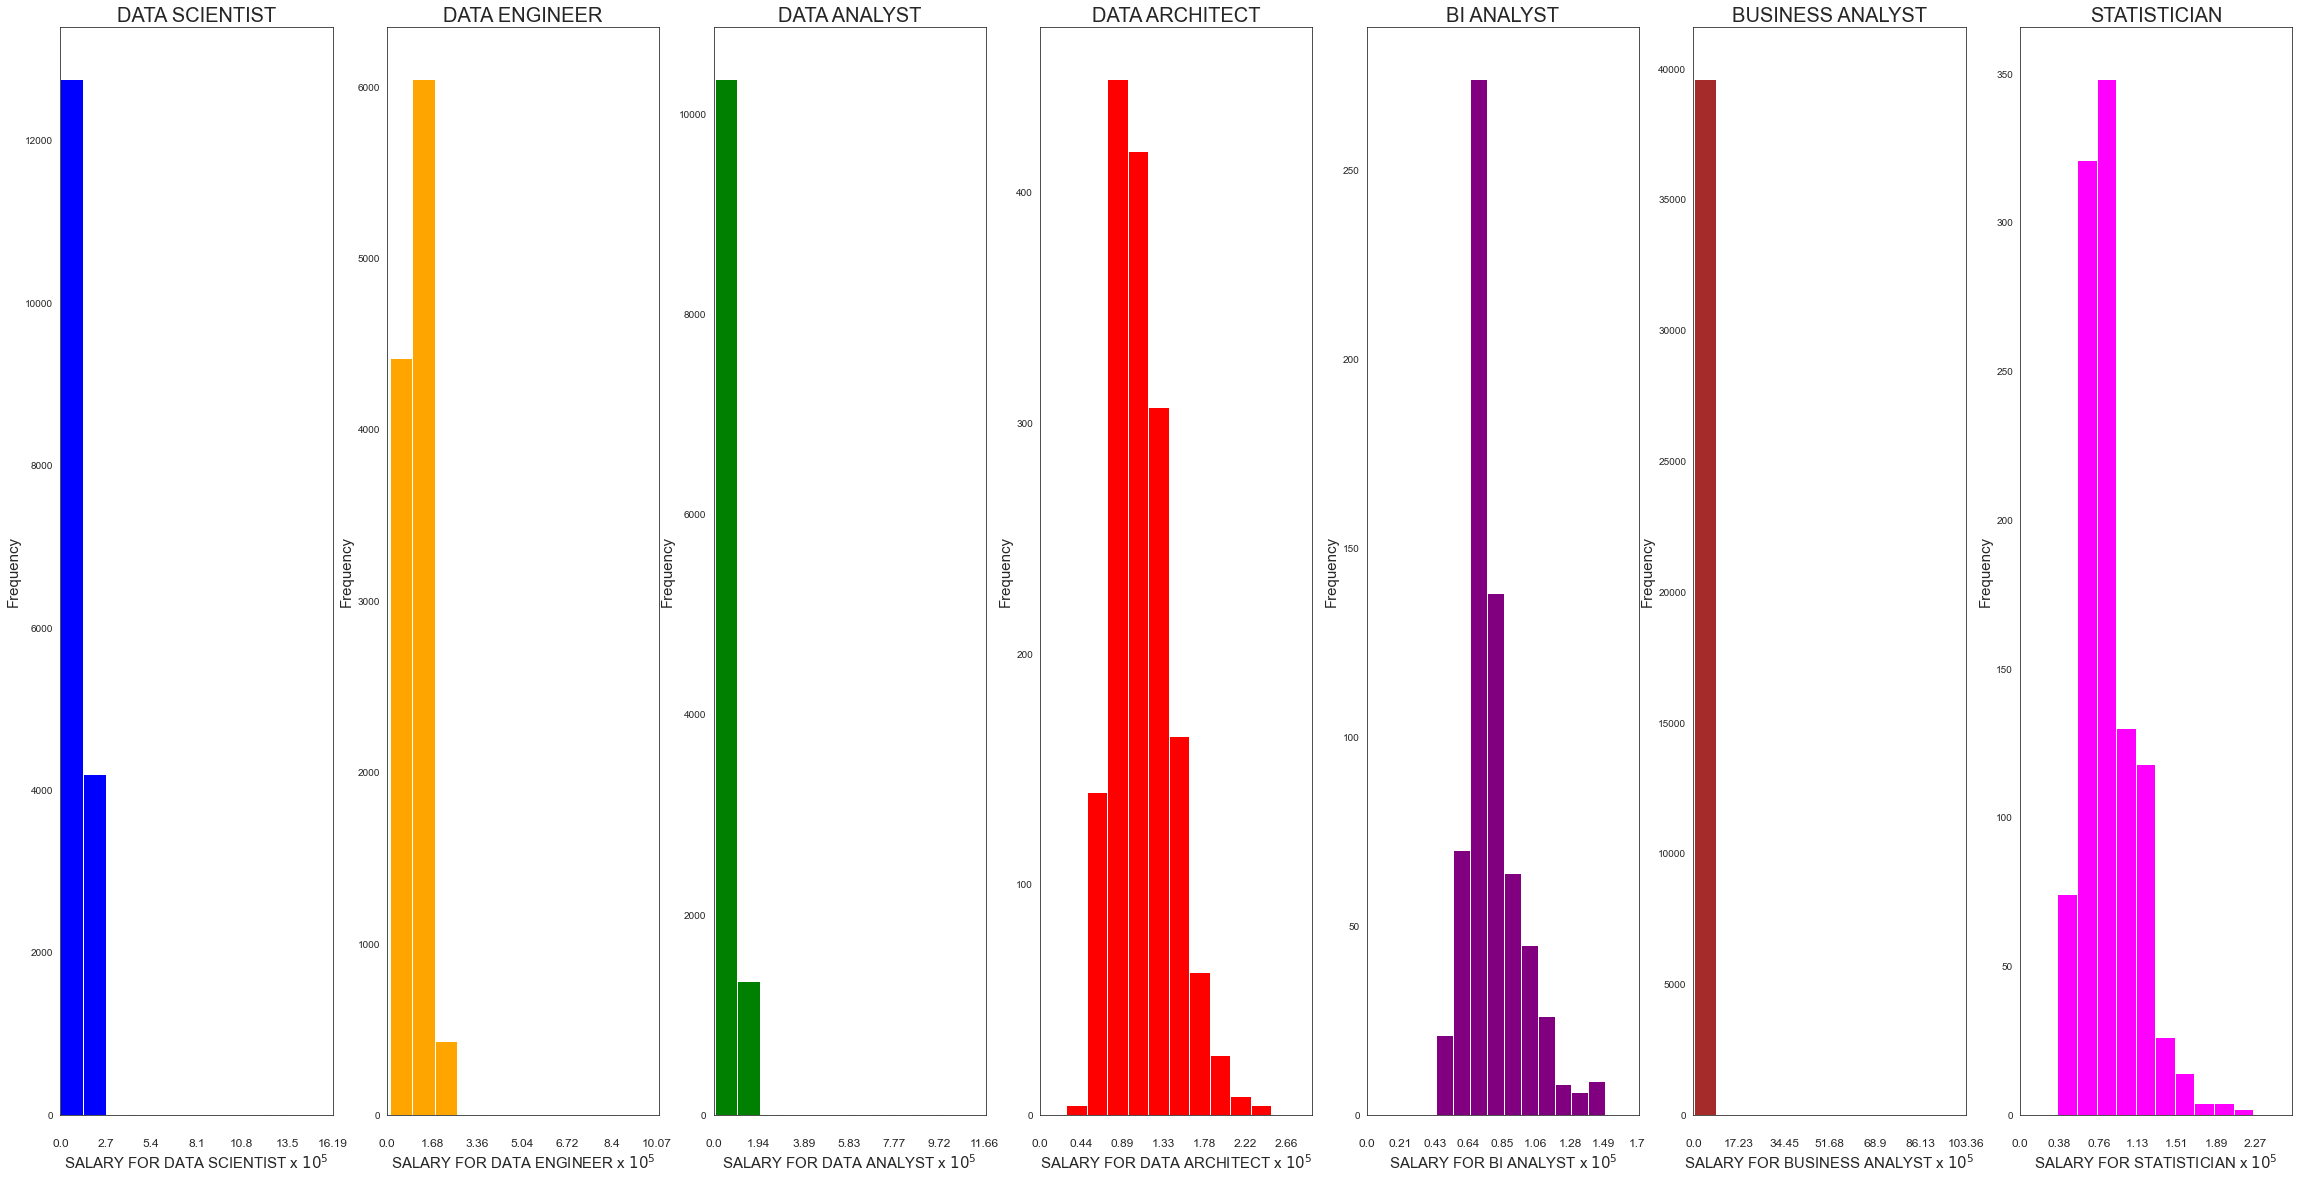

In [42]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(40,20))
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  

  
  n_ticks= 5
  power=5
  scaling= 10**power
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']/ scaling
  
  
  
  
 
  
  max_sal=  salaries.max()
  min_sal = salaries.min()
  step = (max_sal - min_sal )/ n_ticks
  range_sal =  [round(el,2) for el in np.arange(0 , max_sal + step, step) ] 
  
  #set title
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
  
  
  #set ticks
  

  axs[i].set_xlim([0, max_sal])
  axs[i].set_xticks(range_sal)
  axs[i].tick_params(axis='x', which='major', pad=20)
  axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=12)
  axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
  axs[i].set_title(f"{job}", fontsize=20)
  axs[i].set_xlim([0, max_sal + step])
  
  
  #plot
  
  salaries.plot(kind='hist', ax= axs[i],color=JOB_COLORS[i])

Como podemos ver há muitos outliers, e eles estão distorcendo fortemente os dados, da a sua discrepância em relação aos valores representativos. Necessitamos elimina-los, como da última vez vamos checar se de fato todas as variáveis não são normais como visualmente aparentam.

In [43]:
for job in h1bdata_df_preprocessed['title'].unique():
    stat, p = kstest( h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title'] == job]['salary'], 'norm')
    alpha = 0.05
    
    if p > alpha:
        print(f"Os salarios para {job} SEGUEM uma distruição normal")
    else:
        print(f"Os salarios para {job} NÃO SEGUEM uma distruição normal")

Os salarios para DATA SCIENTIST NÃO SEGUEM uma distruição normal
Os salarios para DATA ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ANALYST NÃO SEGUEM uma distruição normal
Os salarios para DATA ARCHITECT NÃO SEGUEM uma distruição normal
Os salarios para BI ANALYST NÃO SEGUEM uma distruição normal
Os salarios para BUSINESS ANALYST NÃO SEGUEM uma distruição normal
Os salarios para STATISTICIAN NÃO SEGUEM uma distruição normal


ok, então vamos filtrar os outliers pelo IRQ como fizemos no último deataset e das mesma forma, já que filtragem pela categorias que nos interessam são mais eficiente como pudemos ver.
Após a filtragem vamos checar como tudo ficou

In [44]:
h1bdata_df_preprocessed = DataFilter(filter_by="FILTER_OUTLIERS_CATEGORICALLY_BY_IRQ", col='salary', category_col='title').process_data(h1bdata_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



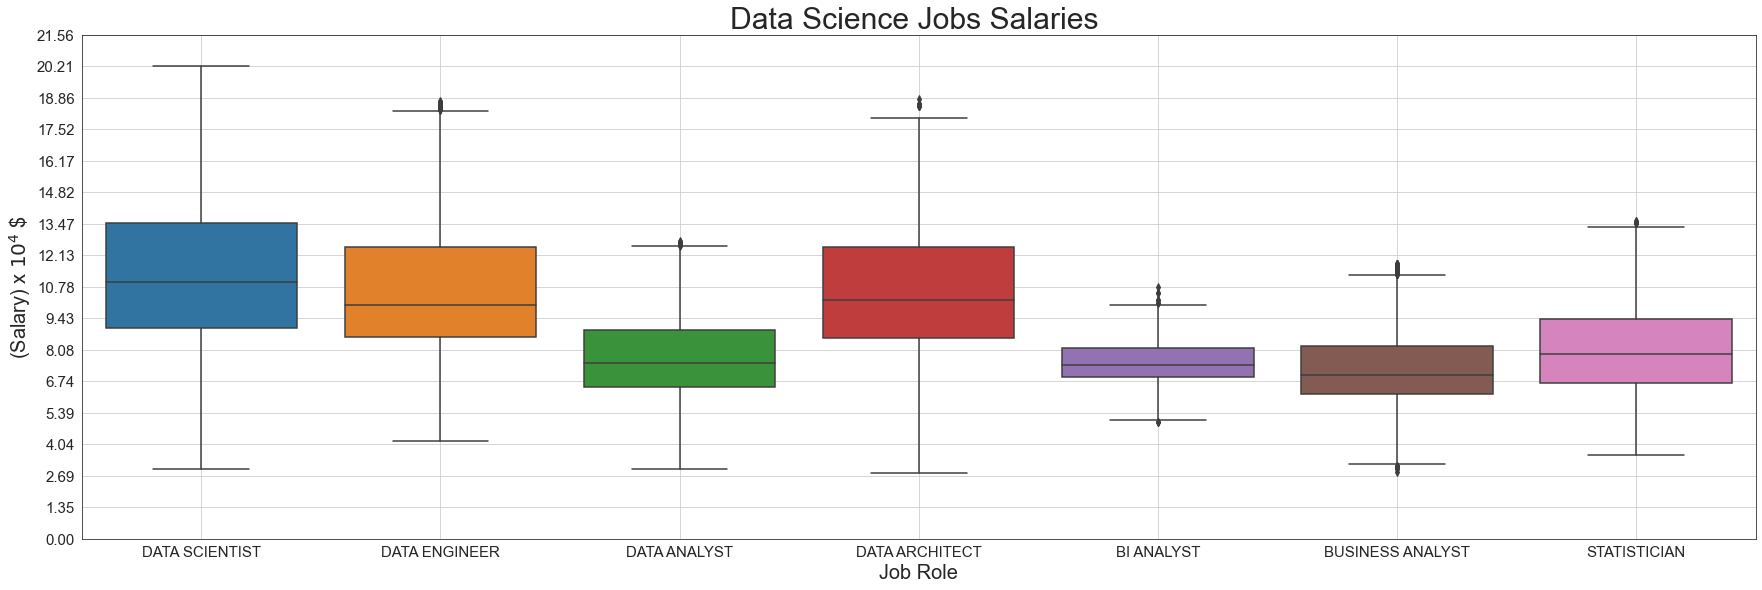

In [45]:
plt.figure(figsize=(30,20))
power = 4
scaling = 10**power
h1bdata_df_preprocessed_rescaled = h1bdata_df_preprocessed.copy()
h1bdata_df_preprocessed_rescaled['salary'] = h1bdata_df_preprocessed_rescaled['salary'] / scaling
sns.boxplot(data=h1bdata_df_preprocessed_rescaled, y="salary",x='title')
sns.set_style('white')


max_sal =( h1bdata_df_preprocessed_rescaled['salary']).max()
n_ticks = 15
step = max_sal / n_ticks
salaries = np.arange(0, max_sal + 3*step, step)

plt.title("Data Science Jobs Salaries ", fontsize=30)
plt.ylabel(f"(Salary) x $10^{power}$ \$", fontsize=20)
plt.xlabel("Job Role", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(salaries, fontsize=15)
plt.ylim([0,max_sal + step])
plt.subplots_adjust(top=0.85, bottom=0.5)
plt.grid()

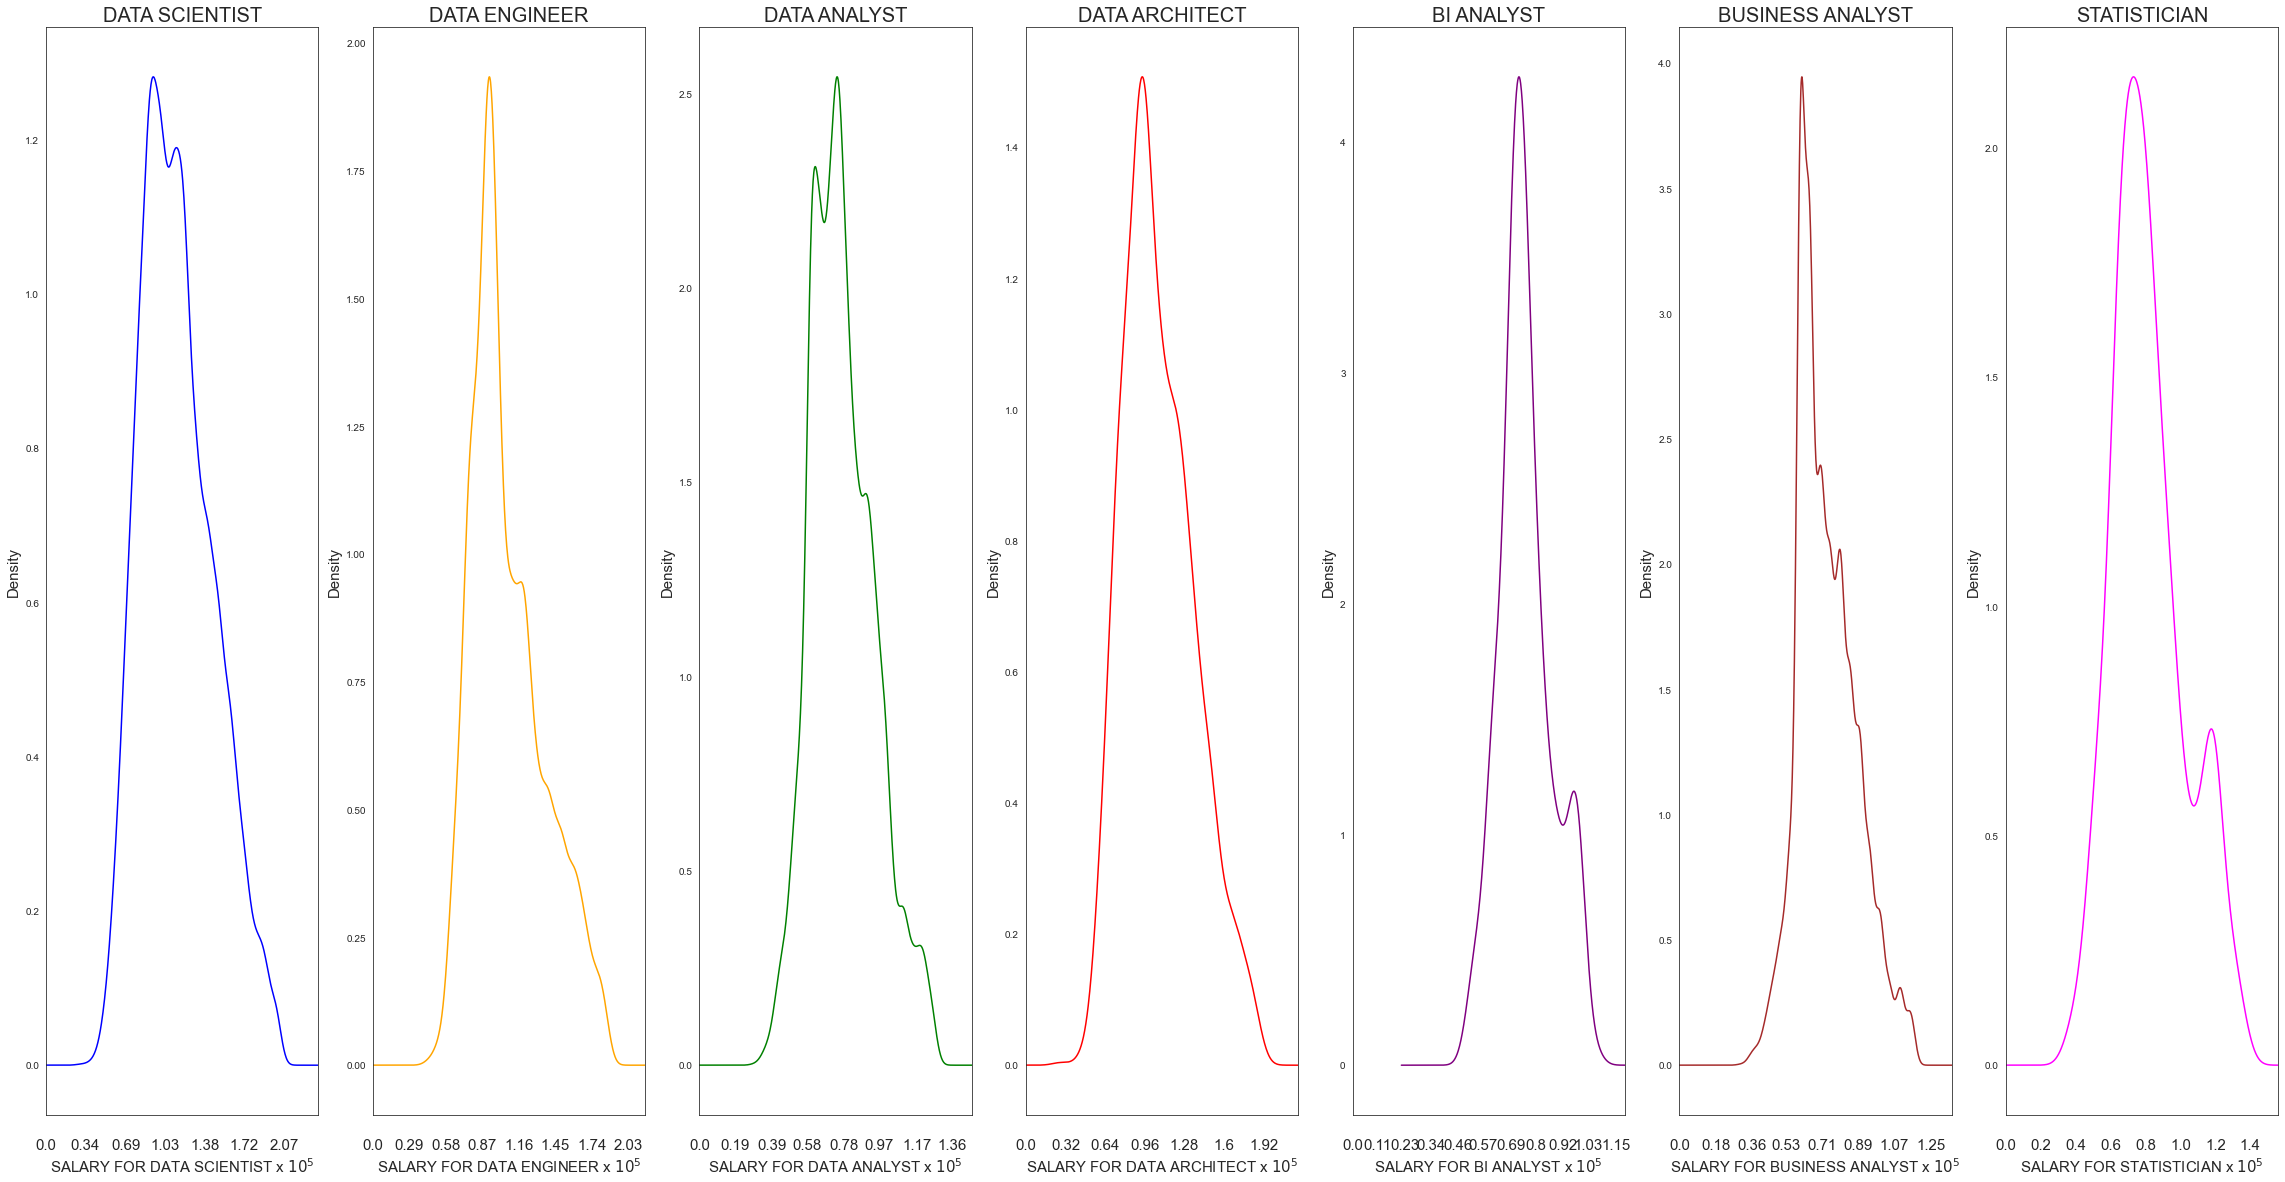

In [46]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(40,20))
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  

  
  n_ticks= 5
  power=5
  scaling= 10**power
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']/ scaling
  
  
  
  
 
  
  max_sal=  salaries.max()
  min_sal = salaries.min()
  step = (max_sal - min_sal )/ n_ticks
  range_sal =  [round(el,2) for el in np.arange(0 , max_sal + step, step) ] 
  
  #set title
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
  
  
  #set ticks
  

  axs[i].set_xlim([0, max_sal])
  axs[i].set_xticks(range_sal)
  axs[i].tick_params(axis='x', which='major', pad=20)
  axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=15)
  axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
  axs[i].set_title(f"{job}", fontsize=20)
  axs[i].set_xlim([0, max_sal + step])
  
  
  #plot
  
  salaries.plot(kind='density', ax= axs[i],color=JOB_COLORS[i])

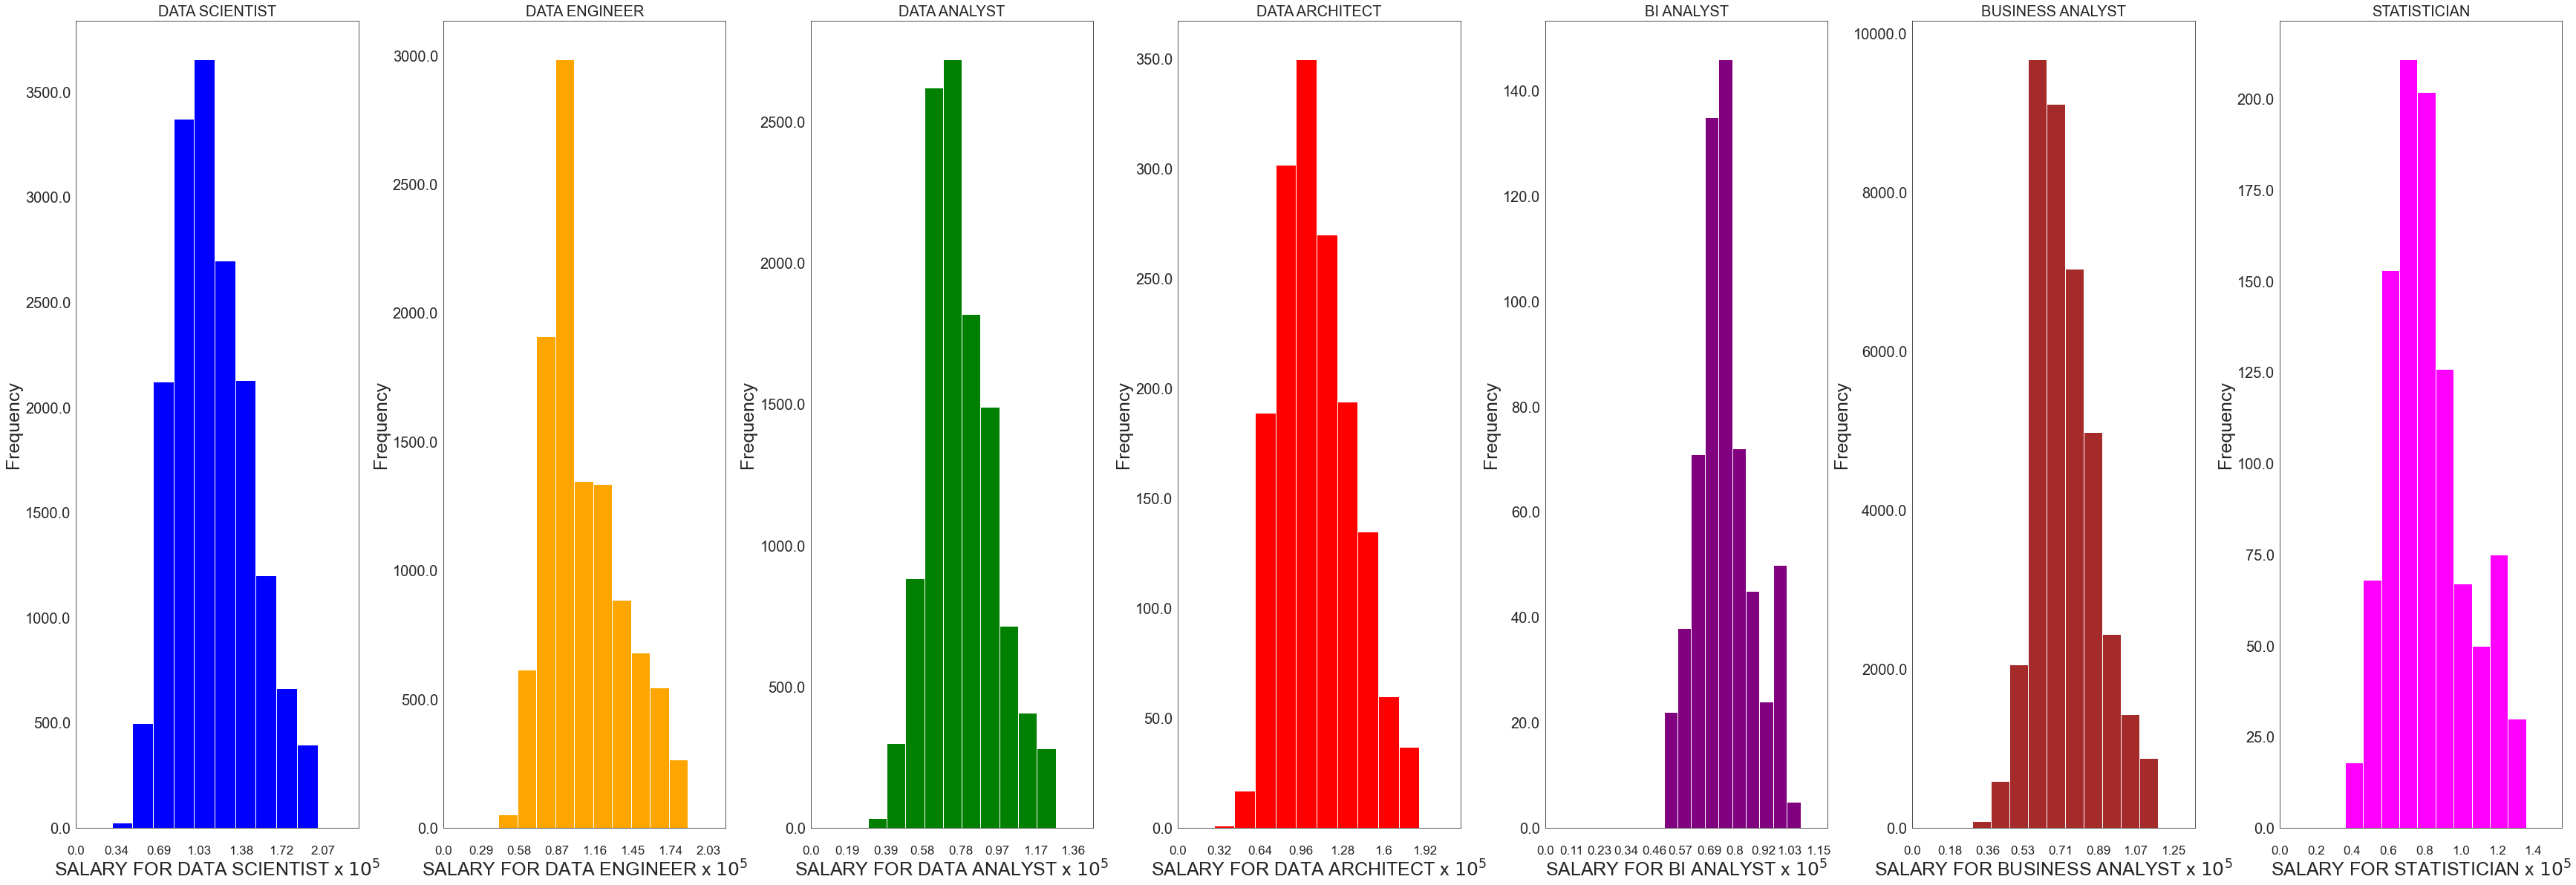

In [47]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(60,20))
fig.set_facecolor('white')
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  

  
  n_ticks= 5
  power=5
  scaling= 10**power
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']/ scaling
  
  
  
  
 
  
  max_sal=  salaries.max()
  min_sal = salaries.min()
  step = (max_sal - min_sal )/ n_ticks
  range_sal =  [round(el,2) for el in np.arange(0 , max_sal + step, step) ] 
  
  #set title
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
  
  
  #set ticks
  

  axs[i].set_xlim([0, max_sal])
  axs[i].set_xticks(range_sal)
  axs[i].tick_params(axis='x', which='major', pad=20)
  axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=17)
  
  axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=25)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 25)
  axs[i].set_title(f"{job}", fontsize=20)
  axs[i].set_xlim([0, max_sal + step])
  
  
  ax = salaries.plot(kind='hist', ax= axs[i],color=JOB_COLORS[i])
  ax.set_yticklabels([ str(el) for el in ax.get_yticks() ] , fontsize=20)
  #plot
  
  

Outra coisa observada na avaliação preliminar foi que   a coluna de data não esta no formato de data e sim object, por isso precisamos converte-la e ajusta-la para formato brasileiro, já que a data está em formato americano.

In [48]:
h1bdata_df_preprocessed['date']

0        04/09/2020
1        03/18/2016
2        02/18/2015
3        02/18/2015
4        03/16/2017
            ...    
82389    08/27/2022
82390    08/26/2022
82391    10/26/2015
82392    03/13/2019
82393    06/09/2018
Name: date, Length: 80150, dtype: object

In [49]:

h1_bdata_covert_date_to_datetime = DataTypeConversor(to_type='TO_DATETIME', col = 'date',actual_date_format="%m/%d/%Y", to_date_format = "%d/%m/%Y")
h1bdata_df_preprocessed = h1_bdata_covert_date_to_datetime.process_data(h1bdata_df_preprocessed)

Perform Data conversion... 
Data conversion DONE !



In [50]:

h1bdata_df_preprocessed['date']

0       2020-04-09
1       2016-03-18
2       2015-02-18
3       2015-02-18
4       2017-03-16
           ...    
82389   2022-08-27
82390   2022-08-26
82391   2015-10-26
82392   2019-03-13
82393   2018-06-09
Name: date, Length: 80150, dtype: datetime64[ns]

In [51]:
h1bdata_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80150 entries, 0 to 82393
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   company   80150 non-null  object        
 1   title     80150 non-null  object        
 2   salary    80150 non-null  float64       
 3   location  80150 non-null  object        
 4   date      80150 non-null  datetime64[ns]
 5   date_str  80150 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.3+ MB


In [52]:
import pandas as pd

# create sample dataframe with date_str column
df = pd.DataFrame({
    'id': [1, 2, 3],
    'date_str': ['04/13/2023', '04/14/2023', '04/15/2023'],
    'value': [100, 200, 300]
})

# convert date_str column to datetime with American format
df['date'] = pd.to_datetime(df['date_str'], format='%m/%d/%Y')

# convert datetime column to Brazilian format
df['date_br'] = df['date'].dt.strftime('%d/%m/%Y')

# convert datetime column to datetime data type
df['date'] = pd.to_datetime(df['date_br'], format='%d/%m/%Y')

# display the resulting dataframe with datetime format
print(df['date'])

0   2023-04-13
1   2023-04-14
2   2023-04-15
Name: date, dtype: datetime64[ns]


outro ajuste a ser feito é um split na coluna location. Não faz sentido para nossa análise ter uma coluna  com estado,cidade.

In [53]:
h1bdata_df_preprocessed['location']

0            ORLANDO, FL
1          PALO ALTO, CA
2           FORT LEE, NJ
3           FORT LEE, NJ
4        JOHNS CREEK, GA
              ...       
82389       SOMERSET, NJ
82390       SOMERSET, NJ
82391      CHARLOTTE, NC
82392       BENSALEM, PA
82393       SOMERSET, NJ
Name: location, Length: 80150, dtype: object

In [54]:
from Preprocessing.TransformData.DataSplitter import DataSplitter


h1_bdata_splitt_location_column = DataSplitter(delimiter = ',' , old_col = 'location', new_col1='city', new_col2='state')
h1bdata_df_preprocessed = h1_bdata_splitt_location_column.process_data(h1bdata_df_preprocessed)

Performing Data splitting...
Data splitting DONE !



In [55]:
h1bdata_df_preprocessed[['city','state']]

,city,state
0,ORLANDO,FL
1,PALO ALTO,CA
2,FORT LEE,NJ
3,FORT LEE,NJ
4,JOHNS CREEK,GA
...,...,...
82389,SOMERSET,NJ
82390,SOMERSET,NJ
82391,CHARLOTTE,NC
82392,BENSALEM,PA


Contudo ainda existe um pequeno problema, algumas colunas estavam formatadas incorretamente. Ou com um nome contendo o estado ou com a  cidade correspondente na coluna onde deveriam estar apenas siglas dos estados americanos.


In [56]:
h1bdata_df_preprocessed['state'].unique()

array([' FL', ' CA', ' NJ', ' GA', ' IL', ' WI', ' TX', ' MA', ' MI',
       ' WA', ' DE', ' MD', ' NY', ' VA', ' MO', ' NC', ' TN', ' MN',
       ' IN', ' PA', ' OH', ' IA', ' AZ', ' CO', ' UT', ' LA', ' OK',
       ' AR', ' OR', ' KS', ' NH', ' NV', ' DC', ' NE', ' CT', ' PR', '',
       ' KY', ' SC', ' AL', ' NM', ' MS', ' ND', ' RI', ' ID',
       ' IL 60654', ' HI', ' WY', ' SD', ' VT', ' ME', ' SHOREVIEW',
       ' NJ 07642', ' D.C.', ' WV', 'NEW YORK', ' VT.', ' SAN RAMON',
       ' ATLANTA', ' MT', ' CA 95134', ' TX 77002', ' 5TH FL', ' AK',
       ' D.C', ' DC 20006', ' VI', ' MINNEAPOLIS', 'LONG ISLAND CITY',
       ' ETS DRIVE', ' ', ' MO 63105', ' WASHINGTON', ' NEW YORK'],
      dtype=object)

sendo assim feizmos um mapeamento e a substituição para corrigir esse problema

In [57]:
map = {
    "DC 20006": "WA",
    "CA 95134": "CA",
    "WASHINGTON": "WA",
    "VT.": "VT"	,
    "TX 77002": "TX",
    "NJ 07642": "NJ",
    "IL 60654": "IL",
    "SHOREVIEW":"MN",
    "MINNEAPOLIS": "MN",
    "MO 63105":"MO",
    "SAN RAMON,":	"CA",
    "SAN RAMON": "CA",
    "5TH FL": "FL",
    "NEW YORK": "NY",
    'NY,': "NY",
    "ETS DRIVE": "unknown",
    '': "unknown",
    "D.C.":"WA",
    "D.C":"WA",
    "ATLANTA":"GA",
    "LONG ISLAND CITY": "NY"

}

map_replace_states = DataReplacer(task="MAPREPLACING", on_col='state', map = map)

h1bdata_df_preprocessed = map_replace_states.process_data(h1bdata_df_preprocessed)

Performing Data Replacement... 
Data Replacement DONE !



In [58]:
h1bdata_df_preprocessed['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'DC',
       'NE', 'CT', 'PR', 'UNKNOWN', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND',
       'RI', 'ID', 'HI', 'WY', 'SD', 'VT', 'ME', 'WV', 'MT', 'AK', 'VI'],
      dtype=object)

não estamos interessandos em registros de localiade desconhecida, vamos então elimina-los.

In [59]:
h1bdata_df_preprocessed  = DataFilter(filter_by="FILTER_EQUAL_VALUE", by_value='unknown', col='state').process_data(h1bdata_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [60]:
h1bdata_df_preprocessed['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'DC',
       'NE', 'CT', 'PR', 'UNKNOWN', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND',
       'RI', 'ID', 'HI', 'WY', 'SD', 'VT', 'ME', 'WV', 'MT', 'AK', 'VI'],
      dtype=object)

In [61]:
h1bdata_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80150 entries, 0 to 82393
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   company   80150 non-null  object        
 1   title     80150 non-null  object        
 2   salary    80150 non-null  float64       
 3   date      80150 non-null  datetime64[ns]
 4   date_str  80150 non-null  object        
 5   city      80150 non-null  object        
 6   state     80150 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 4.9+ MB


In [62]:
h1bdata_df_preprocessed.head(20)

,company,title,salary,date,date_str,city,state
0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,45980.0,2020-04-09,09/04/2020,ORLANDO,FL
1,PERCOLATA CORPORATION,DATA SCIENTIST,46060.0,2016-03-18,18/03/2016,PALO ALTO,CA
2,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,2015-02-18,18/02/2015,FORT LEE,NJ
3,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,2015-02-18,18/02/2015,FORT LEE,NJ
4,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,50000.0,2017-03-16,16/03/2017,JOHNS CREEK,GA
5,YONO HEALTH INC,DATA SCIENTIST,50220.0,2017-02-28,28/02/2017,SUNNYVALE,CA
6,EONUM INC,DATA SCIENTIST,51100.0,2021-04-08,08/04/2021,IRVINE,CA
7,EONUM INC,DATA SCIENTIST,51100.0,2021-04-12,12/04/2021,IRVINE,CA
8,EONUM INC,DATA SCIENTIST,51100.0,2021-04-16,16/04/2021,IRVINE,CA
9,OPEN DATA GROUP INC,DATA SCIENTIST,51860.0,2019-02-28,28/02/2019,CHICAGO,IL


pre-processamento no h1bdata ok, vamos aos dataset relativos a descriptions: Glassdoor e kaggle

### Jobs Description
Faremos agora a verificação dos datasets relativos  a descrições de vagas de trabalho anunciadas nas principais plataformas (kaagle, linkedin, dentre outros). É importante destacar que ambos os datasets são de vagas restrito nos EUA. Apesar disso, eles podem mostrar um tendencia global já que o mercado dos EUA tem forte influência global

In [63]:
job_description_kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    790 non-null    int64 
 1   title         790 non-null    object
 2   company       790 non-null    object
 3   announcement  790 non-null    object
 4   description   790 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.0+ KB


In [64]:
job_description_kaggle_df.head(20)

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."
5,5,Senior Solutions Architect (Data Science),The Trade Desk,LinkedIn,The Trade Desk is a global technology company ...
6,6,Senior Data Scientist,Tango Card,Startup Jobs,The JobTango Card is hiring our first ever Sen...
7,7,"Data Scientist - Research, Development & Const...",HFR,LinkedIn,"Company Description: HFR, Inc. (HFR) was found..."
8,8,Data Science Manager - S&A Strategy,Deloitte,Mendeley,"Data Science Manager SFL Scientific, a Deloit..."
9,9,Senior/Principal Data Scientist,Lumicity,LinkedIn,Senior Data Scientist AND Principal Data Scien...


In [65]:
#Retitrando coluna indesejada
job_description_kaggle_df.drop('Unnamed: 0', axis = 1, inplace=True)

Nesse dataset, é interssante somente simplificar os título dos jobs. Pois queremos apenas usa-lo para descobrir o que é mais requqerido nas vagas anunciadas.  Um mapeamento cuidadoso fora feito e colocado num arquivo csv, em seguida esse mesmo arquivo fora usado para  realizar a simplificação,  não foi possível simplificar alguns títulos dado a falta de clareza que alguns expressavam e o fato de alguns deles nem mesmo parecer ser  vagas de  trabalhos em datascience, então simplimento o eliminamos  no pré-processamento.

In [66]:
job_title_kaggle_map = CsvReader(DATASET_PATH + "Jobs_descriptions_EUA/job_role_mapping/mapa_job_roles_kaggle.csv" , delimiter=';').load_data()
job_title_kaggle_map = dict(job_title_kaggle_map[['Original','Simplyfied']].values)
job_title_kaggle_map = {k.upper(): v.upper() for k,v in  job_title_kaggle_map.items()}
job_title_kaggle_map

#Simplifying job roles on kaggle dataset Preprocessor

simplify_job_role_on_glassdorr_db = DataReplacer(task="MAPREPLACING", on_col="title", map = job_title_kaggle_map)

# Eliminate useless titles by frequency  Preprocessor

useless_title_eliminator = DataFilter(filter_by="FREQ_LOWER_THAN_VALUE", col='title', by_value= 2)


#Perform preprocessing
job_description_kaggle_preprocessors = [ simplify_job_role_on_glassdorr_db, useless_title_eliminator ]
job_description_kaggle_preprocessing =  PreProcessing( pre_processors= job_description_kaggle_preprocessors)
job_description_kaggle_df_preprocessed =  job_description_kaggle_preprocessing.process_data(job_description_kaggle_df)


job_description_kaggle_df_preprocessed['title'].value_counts()


Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 



DATA ANALYST       438
DATA SIENTIST      270
DATA SPECIALIST     22
DATA ENGINEER        4
Name: title, dtype: int64

In [67]:
job_description_kaggle_df_preprocessed.head(20)

,title,company,announcement,description
0,DATA ANALYST,TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,DATA SIENTIST,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
3,DATA SIENTIST,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,DATA SIENTIST,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."
6,DATA SIENTIST,Tango Card,Startup Jobs,The JobTango Card is hiring our first ever Sen...
7,DATA SIENTIST,HFR,LinkedIn,"Company Description: HFR, Inc. (HFR) was found..."
9,DATA SIENTIST,Lumicity,LinkedIn,Senior Data Scientist AND Principal Data Scien...
10,DATA SIENTIST,Booz Allen Hamilton,Booz Allen Hamilton,Data Scientist The Opportunity... As a Data ...
11,DATA ANALYST,JLT Employee Benefits,Adzuna,"At Mercer, we deliver innovative solutions tha..."
12,DATA SIENTIST,Intelletec,LinkedIn,Leading NYC Private Equity firm focused on Pha...


No dataset vindo do Kaggle o trabalho é o mesmo, a diferença é que tem uma etapa a mais antes da realização da substituição por mapeamento. Antes   simplificamos os nome dos títulos dos job por palavra chaves que nele contém para depois fazer a substituição por mapeamento para depois eliminar os títulos que não interessam. Além disso algumas substituições serão feitas para os dados ficar mais claros, onde está com "-1" significa que não se tem aquele dado, então ele será subsituído por 'unknown' para ficar mais explícito

In [68]:
job_description_glassdoor_df

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [69]:
job_description_glassdoor_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [70]:
# Replace if contains
jobs =  ["DATA SCIENTIST","DATA ENGINEER","DATA ANALYST","DATA ARCHITECT","BI ANALYST","BUSINESS ANALYST","STATISTICIAN", "DATA ANALYTICS","DATA SPECIALIST", "DATA SCIENCE","DATA ANALYSIS","ANALYST", "ANALYTICS","DATA MANAGEMENT SPECIALIST","BUSINESS ANALYSIS", "MACHINE LEARNING ENGINEER", "RESEARCH","SOFTWARE ENGINEER","MACHINE LEARNING SCIENTIST","ASSOCIATE SCIENTIST", "DATA MODELER"]
glassdoor_job_replace_if_contains = DataReplacer(task="IFCONTAINSREPLACNING", on_col= 'Job Title', values= jobs)


#Simplifying titles on glassdoor database
map = {
    "BUSINESS ANALYSIS": "DATA ANALYST",
     "DATA ANALYTICS": "DATA ANALYST",
     "DATA ANALYSIS": "DATA ANALYST",
     "DATA SCIENCE" : "DATA SCIENTIST",
     "ANALYST": "DATA ANALYST",
     "DATA MANAGEMENT SPECIALIST": "DATA SPECIALIST",
     "ANALYTICS":"DATA ANALYST",
     "RESEARCH": "RESEARCHER",
     "MACHINE LEARNING SCIENTIST": "RESEARCHER",
     "DATA ENGINEER I": "DATA ENGINEER",
     "DATA ENGINEER II": "DATA ENGINEER",
     "DATA ENGINEER III": "DATA ENGINEER",
     "DATA ANALYST I":"DATA ANALYST",
     "DATA ANALYST II":"DATA ANALYST",
     "DATA ANALYST III":"DATA ANALYST",
     "DATA ANALYST JUNIOR":"DATA ANALYST",
     "DATA ARCHITECT II": "DATA ARCHITECT",
     "DATA ARCHITECT I": "DATA ARCHITECT",
     "DATA ARCHITECT III": "DATA ARCHITECT",
     "MARKETING DATA ANALYST": "DATA ANALYST",
     "DATA ENGINEER (REMOTE)": "DATA ENGINEER",
     "CLOUD DATA ENGINEER": "DATA ENGINEER",
     "SR. DATA ENGINEER": "DATA ENGINEER",
     "BUSINESS DATA ANALYST	": "DATA ANALYST",
     "SR. DATA ANALYST": "DATA ANALYST",
     "SENIOR MACHINE LEARNING ENGINEER": "MACHINE LEARNING ENGINEER",
     "DATA SCIENTIST (REMOTE)": "DATA SCIENTIST",
     "DATA SCIENTIST I": "DATA SCIENTIST",
     "DATA SCIENTIST II": "DATA SCIENTIST",
     "DATA SCIENTIST III": "DATA SCIENTIST",
     "AWS DATA ENGINEER":"DATA ENGINEER",
     "AZURE DATA ENGINEER":"DATA ENGINEER",
     "DATA SCIENCE ENGINEER":"DATA SCIENTIST",
     "MACHINE LEARNING ENGINEER (IMAGING)": "MACHINE LEARNING ENGINEER",
     "MACHINE LEARNING SCIENTIST":"RESEARCHER"

}


glassdoor_job_title_simplifier = DataReplacer(task='MAPREPLACING', on_col = 'Job Title', map=map)


#eliminate unfrequent values

glassdoor_unfrequent_title_elimination = DataFilter(filter_by = "FREQ_LOWER_THAN_VALUE", col='Job Title', by_value= 108)


#glassdoor preprocessing


job_description_glassdoor_preprocessors = [ glassdoor_job_replace_if_contains, glassdoor_job_title_simplifier, glassdoor_unfrequent_title_elimination ]
job_description_glassdoor_preprocessing =  PreProcessing( pre_processors= job_description_glassdoor_preprocessors)
job_description_glassdoor_preprocessed =  job_description_glassdoor_preprocessing.process_data(job_description_glassdoor_df)
job_description_glassdoor_preprocessed.replace(-1, 'unknown', inplace=True)
job_description_glassdoor_preprocessed.replace('-1', 'unknown', inplace=True)



Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 



In [71]:
job_description_glassdoor_preprocessed

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,unknown,unknown
1,1,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,unknown,unknown
2,2,DATA SCIENTIST,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,unknown,Decode_M,"New York, NY","New York, NY",1 to 50 employees,unknown,Unknown,unknown,unknown,Unknown / Non-Applicable,unknown,True
3,3,DATA ANALYST,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",unknown
4,4,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,4374,DATA ENGINEER,$55K-$112K (Glassdoor est.),ApTask is a leading staffing and recruitment c...,3.9,ApTask\n3.9,"Dublin, OH","Iselin, NJ",201 to 500 employees,2010,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),"Collabera, Mitchell Martin, The Judge Group",unknown
3904,4375,DATA ENGINEER,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),unknown,unknown
3905,4376,DATA ANALYST,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),unknown,unknown
3906,4377,DATA ENGINEER,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),unknown,unknown


In [72]:
job_description_glassdoor_preprocessed['Job Title'].value_counts()

DATA SCIENTIST               1151
DATA ANALYST                  988
DATA ENGINEER                 742
RESEARCHER                    217
MACHINE LEARNING ENGINEER     108
Name: Job Title, dtype: int64

### Skills

In [73]:
skills_mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9178 entries, 0 to 9177
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Database Fundamentals            9178 non-null   object
 1   Computer Architecture            9178 non-null   object
 2   Distributed Computing Systems    9178 non-null   object
 3   Cyber Security                   9178 non-null   object
 4   Networking                       9178 non-null   object
 5   Software Development             9178 non-null   object
 6   Programming Skills               9178 non-null   object
 7   Project Management               9178 non-null   object
 8   Computer Forensics Fundamentals  9178 non-null   object
 9   Technical Communication          9178 non-null   object
 10  AI ML                            9178 non-null   object
 11  Software Engineering             9178 non-null   object
 12  Business Analysis                9

In [74]:
skills_mapping_df

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
2,Professional,Beginner,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
3,Professional,Average,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
4,Professional,Intermediate,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Poor,Poor,Professional,Graphics Designer
9174,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Beginner,Beginner,Professional,Graphics Designer
9175,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Average,Average,Professional,Graphics Designer
9176,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Intermediate,Intermediate,Professional,Graphics Designer


Vamos verificar se possui o roles que nos interessam

In [75]:
skills_mapping_df['Role'].value_counts()

Database Administrator             540
Hardware Engineer                  540
Data Scientist                     540
Customer Service Executive         540
Business Analyst                   540
Software tester                    540
AI ML Specialist                   540
Technical Writer                   540
Information Security Specialist    540
Project Manager                    540
API Specialist                     540
Software Developer                 540
Networking Engineer                540
Cyber Security Specialist          540
Application Support Engineer       540
Helpdesk Engineer                  539
Graphics Designer                  539
Name: Role, dtype: int64

Alguns Roles não são interessante para nossa analise por isso só ficaremos com aqueles relativo a cargos de trabalho em Data Science: "Database Administrator", "Data Scientist","Business Analyst", "AI ML Specialist"

In [76]:
dict_cols = {}
for skill in skills_mapping_df.columns:
    dict_cols[skill] = (skills_mapping_df[skill].value_counts())

Após uma inspeção visual na saída acima, percebe-se que o dataset tem  as cada skill classificada em 6 categorias bem definidas:

    - Poor             
    - Beginner         
    - Average           
    - Intermediate     
    - Excellent         
    - Professional 

  nenhuma coluna do dataset apresentar alguma inconsistência ou valor faltantes
  Sendo assim basta filtrar o Roles que não nos interessam
  

In [77]:
ds_roles  = ["Database Administrator", "Data Scientist","Business Analyst", "AI ML Specialist"]
skills_mapping_filtering_roles = DataFilter(filter_by="FILTER_BY_VALUES", by_value=ds_roles, col = 'Role')
skills_mapping_df_preprocessed = skills_mapping_filtering_roles.process_data(skills_mapping_df)
skills_mapping_df_preprocessed['Role'].value_counts()

Performing Data Filtering... 
Data Filtering DONE ! 



Database Administrator    540
AI ML Specialist          540
Business Analyst          540
Data Scientist            540
Name: Role, dtype: int64

### Salvando dados pre-processados

Agora que terminamos com o preprocessamento vamos salvar os dados pre-porcessados para possíveis usos futuros

In [78]:
h1bdata_df_preprocessed.to_csv(PRE_PROCESSED_PATH + 'h1bdata_df_preprocessed.csv' )
salaries_world_around_df_preprocessed.to_csv(PRE_PROCESSED_PATH  + 'salaries_world_around_df_preprocessed.csv')
job_description_glassdoor_preprocessed.to_csv(PRE_PROCESSED_PATH + 'job_description_glassdoor_preprocessed.csv')
skills_mapping_df_preprocessed.to_csv(PRE_PROCESSED_PATH + 'skills_mapping_df_preprocessed.csv')

# Extração de Insights

Agora que temos os dados pre-processados podemos começar a extrarir os insights.  Iremos extrair os seguintes insgihts:

- Insights sobre faixas salariais nos 5 países do mundo representativos no conjunto de dados obtivdo, nas seguinte categorias
    - pelos princiapis Job Roles em DS
    - Por nível de experiência
    - focalizaremos no nivel iniciante
- Depois damos um  zoom para os EUA, já que é o páis do qual mais temos dados:
    - Por nível de experiência
    - Por job role
    - Evolução das médias salarias por job role

- Avaliaremos a oportunidade de vagas nos Setores da indústria nos EUA.

- Obter Insights das principais skills demandas tanto pelas descrições da vaga como pelo mapeamento de skills

Mãos a obra...




In [79]:
salaries_world_around_df_preprocessed

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,ENTRY-LEVEL,FT,DATA SCIENTIST,54000,EUR,64369.0,GERMANY,50,GERMANY,LARGE-SIZE
9,2021,SENIOR-LEVEL,FT,DATA SCIENTIST,159500,CAD,127543.0,CANADA,50,CANADA,LARGE-SIZE
10,2021,SENIOR-LEVEL,FT,DATA SCIENTIST,144000,USD,144000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,LARGE-SIZE
12,2021,MID-LEVEL,FT,DATA SCIENTIST,95000,CAD,75966.0,CANADA,100,CANADA,LARGE-SIZE
13,2021,MID-LEVEL,FT,DATA SCIENTIST,150000,USD,150000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
...,...,...,...,...,...,...,...,...,...,...,...
389,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,120000,USD,120000.0,UNITED STATES OF AMERICA,0,UNITED STATES OF AMERICA,MEDIUM-SIZE
446,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,198000,USD,198000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
447,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,114000,USD,114000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
469,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,160000,USD,160000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE


In [80]:
avg_sala_per_country = salaries_world_around_df_preprocessed[['employee_residence','salary_in_usd']].groupby('employee_residence').mean().reset_index().sort_values('salary_in_usd', ascending=False)

avg_sala_per_country



,employee_residence,salary_in_usd
4,UNITED STATES OF AMERICA,149230.879751
0,CANADA,119836.250000
1,GERMANY,92673.264151
3,UNITED KINGDOM,83131.033149
2,INDIA,66375.000000


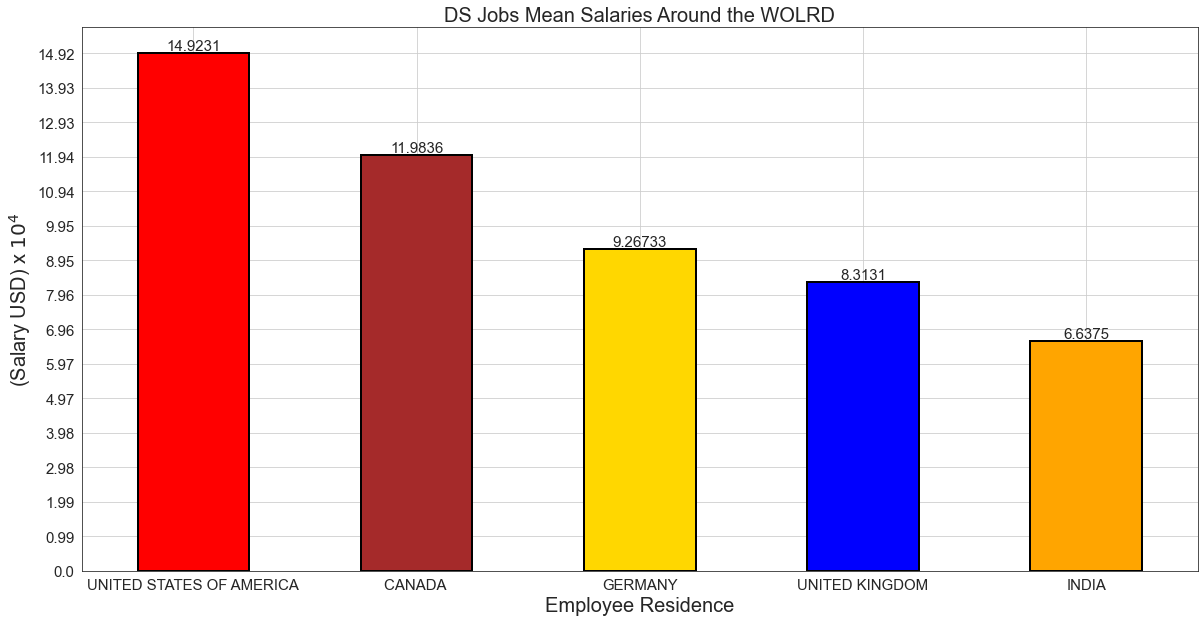

In [81]:
employee_residence = avg_sala_per_country['employee_residence'].values




power= 4
scaling = 10**4
rescaled = avg_sala_per_country.copy()
rescaled['salary_in_usd'] = avg_sala_per_country['salary_in_usd']/scaling
nticks = 15
max_avg_sal =  rescaled['salary_in_usd'].max()
step = max_avg_sal/nticks
range_sal = np.arange(0, max_avg_sal + step, step) 


ax = rescaled.plot(x = 'employee_residence',y = 'salary_in_usd' ,kind='bar', figsize=(20,10), color=['red', 'brown','gold','blue','orange'], legend=False, linewidth=2, edgecolor='black')

ax.set_title("DS Jobs Mean Salaries Around the WOLRD", fontsize=20)
ax.set_yticks(range_sal)
ax.set_yticklabels([str(round(sal,2)) for sal in range_sal]    ,fontsize=15)




ax.set_ylabel(f"(Salary USD) x $10^{power}$", fontsize=20)
ax.set_xlabel("Employee Residence", fontsize = 20)

for i, bar in enumerate(ax.containers):
    
  ax.bar_label(bar, label='$ %.2f'%(float(rescaled['salary_in_usd'].values.flat[i])), label_type='edge', fontsize=15)

plt.xticks(rotation=0, fontsize=15)
plt.grid()

## Insights Salarios por nívels de experiência

Depois de ter visto as médias salarios de uma fomra global por país vamos ver-la por nível de experiência, por isso primeiramente vamos agrupar salários pela job role e pelo nívels de expirência calculando a média

In [82]:
group_by_sal_job_role =  salaries_world_around_df_preprocessed[['job_title','salary_in_usd']].groupby(['job_title']).mean('salary_in_usd').reset_index()

group_by_sal_job_role


,job_title,salary_in_usd
0,DATA ANALYST,112583.012195
1,DATA ARCHITECT,159819.830189
2,DATA ENGINEER,141966.222930
3,DATA SCIENTIST,146977.747433
4,MACHINE LEARNING ENGINEER,152665.986547
5,RESEACHER,152196.553719


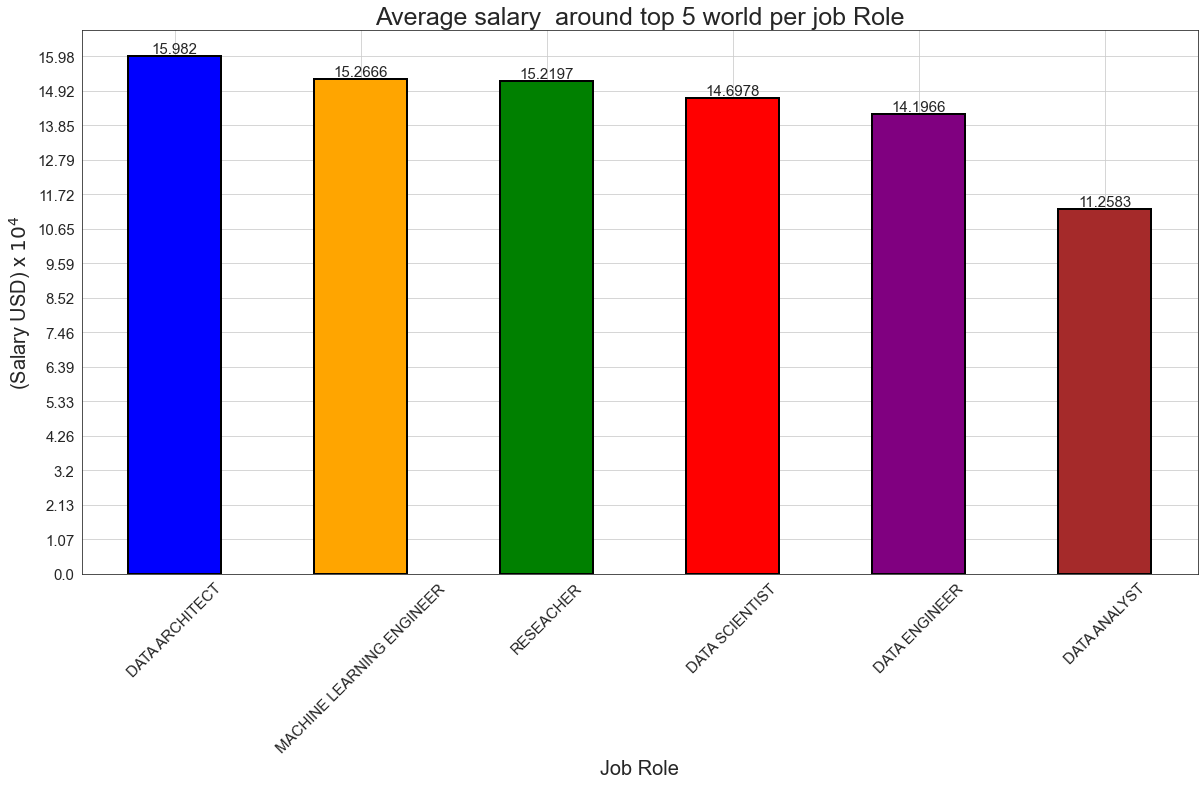

In [83]:


power= 4
scaling = 10**4
rescaled = group_by_sal_job_role.copy()
rescaled['salary_in_usd'] = rescaled['salary_in_usd']/scaling
nticks = 15
max_avg_sal =  rescaled['salary_in_usd'].max()
step = max_avg_sal/nticks
range_sal = np.arange(0, max_avg_sal + step, step) 




ax= rescaled.sort_values('salary_in_usd', ascending=False).plot(kind='bar',x='job_title', y='salary_in_usd', figsize=(20,10), color=JOB_COLORS, linewidth=2, edgecolor='black', legend=False)


ax.set_yticklabels([str(round(sal,2)) for sal in range_sal] ,fontsize=15)
ax.set_yticks(range_sal)

for i, bar in enumerate(ax.containers):
    
  ax.bar_label(bar, label='$ %.2f'%(float(rescaled['salary_in_usd'].values.flat[i])), label_type='edge', fontsize=15)

plt.title('Average salary  around top 5 world per job Role', fontsize=25)

plt.ylabel(f"(Salary USD) x $10^{power}$", fontsize=20)
plt.xlabel("Job Role", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.grid()

In [84]:
group_by_exp_lvl_job_title = salaries_world_around_df_preprocessed[['experience_level','job_title','salary_in_usd']].groupby(['experience_level','job_title']).mean('salary_in_usd').reset_index()
group_by_exp_lvl_job_title.sort_values('job_title')

,experience_level,job_title,salary_in_usd
0,ENTRY-LEVEL,DATA ANALYST,72091.812500
15,SENIOR-LEVEL,DATA ANALYST,123716.535565
9,MID-LEVEL,DATA ANALYST,98217.539062
5,EXPIRIENCED,DATA ANALYST,155636.363636
16,SENIOR-LEVEL,DATA ARCHITECT,159409.020000
10,MID-LEVEL,DATA ARCHITECT,166666.666667
6,EXPIRIENCED,DATA ENGINEER,189589.888889
11,MID-LEVEL,DATA ENGINEER,113565.647059
1,ENTRY-LEVEL,DATA ENGINEER,82773.360000
17,SENIOR-LEVEL,DATA ENGINEER,151716.511041


In [85]:
np.arange(0, max_sal+ step) 


array([0., 1., 2.])

Agora vamos a extração do Insight graficamente:

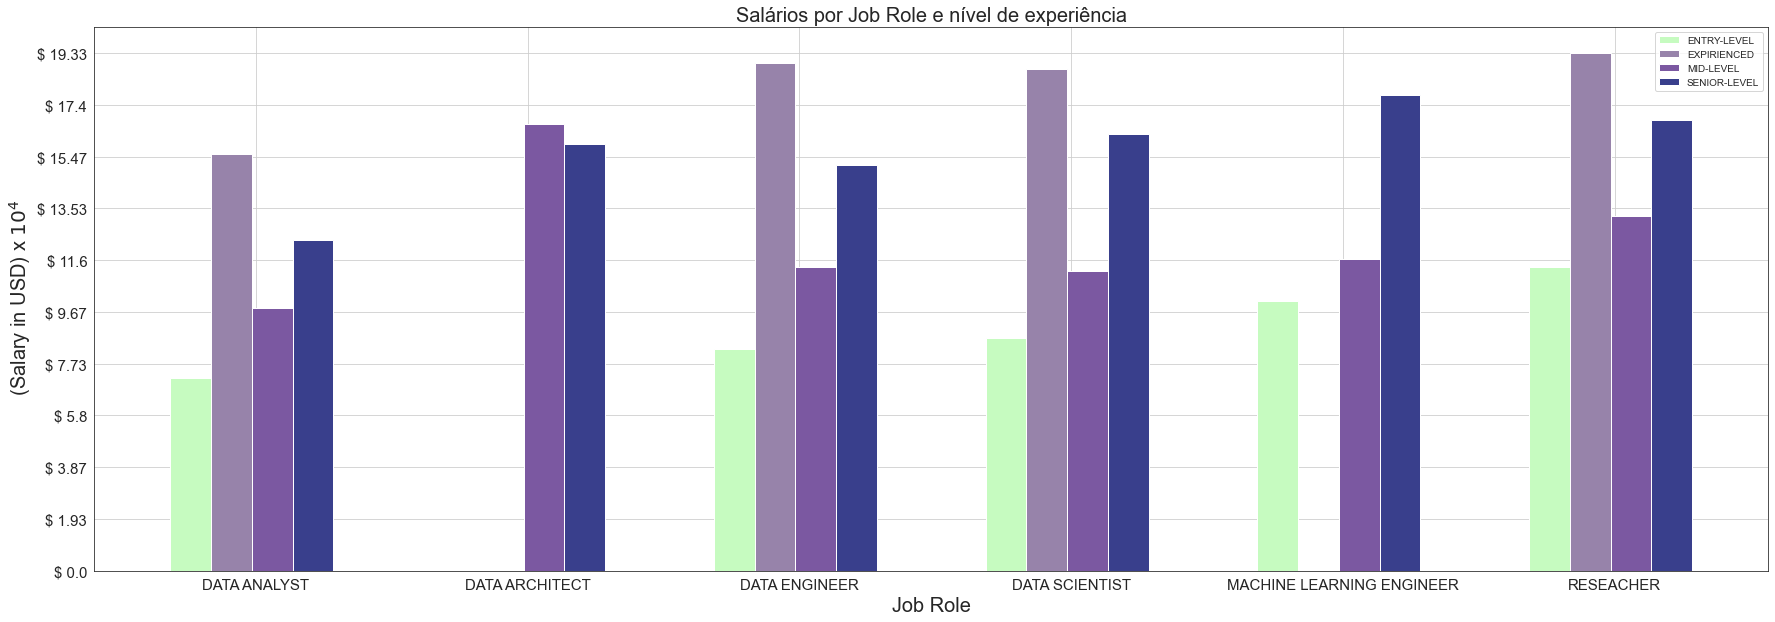

In [86]:
# Data

#'DATA ANALYST' 'DATA ARCHITECT' 'DATA ENGINEER' 'DATA SCIENTIST' 'MACHINE LEARNING ENGINEER' 'RESEACHER'
power= 4
scaling = 10**power
group_by_exp_lvl_job_title_rescaled = group_by_exp_lvl_job_title.copy()
group_by_exp_lvl_job_title_rescaled['salary_in_usd'] = group_by_exp_lvl_job_title_rescaled['salary_in_usd']/scaling


categories = salaries_world_around_df_preprocessed['job_title'].sort_values(ascending=True).unique()
seniors_sals =   [ round(el,2 ) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'SENIOR-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]
mid_level_sals =  [ round(el,2 ) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'MID-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]



#Foi verificado que as categorias expirienced and ENTRY-LEVEL estão faltantes para DATA-Architect e Machinelearning ENGINEER

expirienced_sals =  [ round(el,2) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'EXPIRIENCED'].sort_values('job_title',ascending=True)['salary_in_usd'])  ]
expirienced_sals.insert(1, 0.0)
expirienced_sals.insert(4, 0.0)


#Já aqui só falta para Data Architect
entry_sals = [ round(el,2 ) for el in  list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'ENTRY-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd']) ] 
entry_sals.insert(1, 0.0)


exp_levels_sals = [entry_sals, expirienced_sals, mid_level_sals, seniors_sals  ]


# Set up the figure
fig, ax = plt.subplots(figsize=(30,10))

# Set the width of each bar
bar_width = 0.15
# Set the x positions of the bars
x_pos = np.arange(len(categories))


# Plot the bars
expirience_color_pallete= ['#c6fbc0','#9783aa','#7b58a1','#393f8c']

for i in range(0,len(exp_levels_sals)):
    
    exp_level_sal = exp_levels_sals[i]
    
    job_roles = group_by_exp_lvl_job_title['job_title'].unique()     
        

    if i ==0 :
        ax.bar(x_pos+i*bar_width   , exp_level_sal, width=bar_width, color=expirience_color_pallete[i], align='center')
    
    else:
        ax.bar(x_pos+i*bar_width  , exp_level_sal, width=bar_width, color=expirience_color_pallete[i], align='center')
    
# Set the x-axis labels and tick positions
ax.set_xticks(x_pos + bar_width + 0.09)
ax.set_xticklabels(categories, fontsize=15)

# Set the y-axis label
ax.set_ylabel(f' (Salary in USD) x $10^{power}$', fontsize= 20)



max_sal = group_by_exp_lvl_job_title['salary_in_usd'].max()
min_sal = 0
n_ticks = 10
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el/scaling,2)) for el in range_sal], fontsize=15)




ax.set_xlabel("Job Role", fontsize=20)
# Set the title
ax.set_title('Salários por Job Role e nível de experiência', fontsize=20)

# Add a legend]
ax.legend(['ENTRY-LEVEL','EXPIRIENCED','MID-LEVEL','SENIOR-LEVEL'])

# Show the plot

plt.grid()


Observa-se que temos uma anomalia no gráfico, não é esperado que nenhum nível de experiencia ganhe mais que um nível senior, vamos verificar o porque. Observase que o nivel "Expirienced" ta ganhando mais que  todos os outros nível em todos os job roles, E que no  job role "Data architect", um MID-LEVEL ta ganhando mais que um SENIOR-LEVEL. Vamos verificar o porque:

In [87]:
salaries_world_around_df_preprocessed[['employee_residence','experience_level']][salaries_world_around_df_preprocessed['experience_level']=='EXPIRIENCED' ]['employee_residence'].value_counts()

UNITED STATES OF AMERICA    50
CANADA                       4
GERMANY                      3
UNITED KINGDOM               2
INDIA                        1
Name: employee_residence, dtype: int64

In [88]:
data_architect_jbs = salaries_world_around_df_preprocessed[['employee_residence','experience_level','job_title']][salaries_world_around_df_preprocessed['job_title']=='DATA ARCHITECT']

In [89]:
data_architect_jbs.value_counts()

employee_residence        experience_level  job_title     
UNITED STATES OF AMERICA  SENIOR-LEVEL      DATA ARCHITECT    44
CANADA                    SENIOR-LEVEL      DATA ARCHITECT     4
UNITED STATES OF AMERICA  MID-LEVEL         DATA ARCHITECT     3
UNITED KINGDOM            SENIOR-LEVEL      DATA ARCHITECT     2
dtype: int64

O que se verificou é que as vagas de data architect estão concentradas na américa do norte, nos  dois países que mais bem pagam, o que não explicaria o fato de Senior ganhar menor que um pleno. 


Pesquisas demonstraram que as empresas utilizam mais as cataegorias, junior, pleno, senior, então para esse insight vamos ficar somente com essas 3, até porque a expirienced está em sua sua gigantesca maioria nos EUA, o país que mais bem paga o que explica a distorção dela em relação a outros paises.

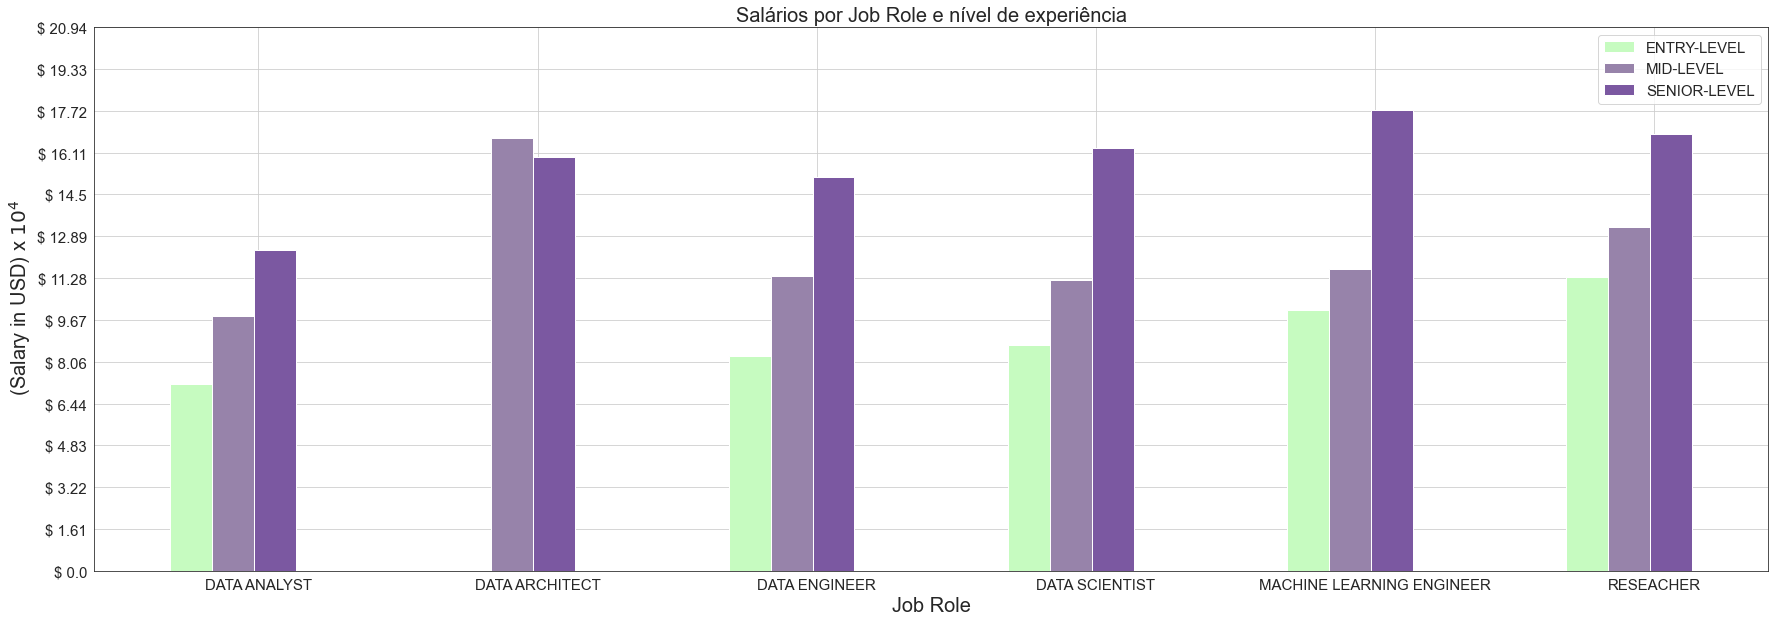

In [90]:
# Data

#'DATA ANALYST' 'DATA ARCHITECT' 'DATA ENGINEER' 'DATA SCIENTIST' 'MACHINE LEARNING ENGINEER' 'RESEACHER'
power= 4
scaling = 10**power
group_by_exp_lvl_job_title_rescaled = group_by_exp_lvl_job_title.copy()
group_by_exp_lvl_job_title_rescaled['salary_in_usd'] = group_by_exp_lvl_job_title_rescaled['salary_in_usd']/scaling


categories = salaries_world_around_df_preprocessed['job_title'].sort_values(ascending=True).unique()
seniors_sals =   [ round(el,2 ) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'SENIOR-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]
mid_level_sals =  [ round(el,2 ) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'MID-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]






#Já aqui só falta para Data Architect
entry_sals = [ round(el,2 ) for el in  list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'ENTRY-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd']) ] 
entry_sals.insert(1, 0.0)


exp_levels_sals = [entry_sals, mid_level_sals, seniors_sals  ]


# Set up the figure
fig, ax = plt.subplots(figsize=(30,10))

# Set the width of each bar
bar_width = 0.15
# Set the x positions of the bars
x_pos = np.arange(len(categories))


# Plot the bars
expirience_color_pallete= ['#c6fbc0','#9783aa','#7b58a1','#393f8c']

for i in range(0,len(exp_levels_sals)):
    
    exp_level_sal = exp_levels_sals[i]
    
    job_roles = group_by_exp_lvl_job_title['job_title'].unique()     
        

    if i ==0 :
        ax.bar(x_pos+i*bar_width   , exp_level_sal, width=bar_width, color=expirience_color_pallete[i], align='center')
    
    else:
        ax.bar(x_pos+i*bar_width  , exp_level_sal, width=bar_width, color=expirience_color_pallete[i], align='center')
    
# Set the x-axis labels and tick positions
ax.set_xticks(x_pos + bar_width + 0.09)
ax.set_xticklabels(categories, fontsize=15)

# Set the y-axis label
ax.set_ylabel(f' (Salary in USD) x $10^{power}$', fontsize= 20)



max_sal = group_by_exp_lvl_job_title['salary_in_usd'].max()
min_sal = 0
n_ticks = 12
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el/scaling,2)) for el in range_sal], fontsize=15)




ax.set_xlabel("Job Role", fontsize=20)
# Set the title
ax.set_title('Salários por Job Role e nível de experiência', fontsize=20)

# Add a legend]
ax.legend(['ENTRY-LEVEL','MID-LEVEL','SENIOR-LEVEL'], fontsize=15)

# Show the plot

plt.grid()


## Faixa salarial por Job role e nivel de experiência nos TOP 5

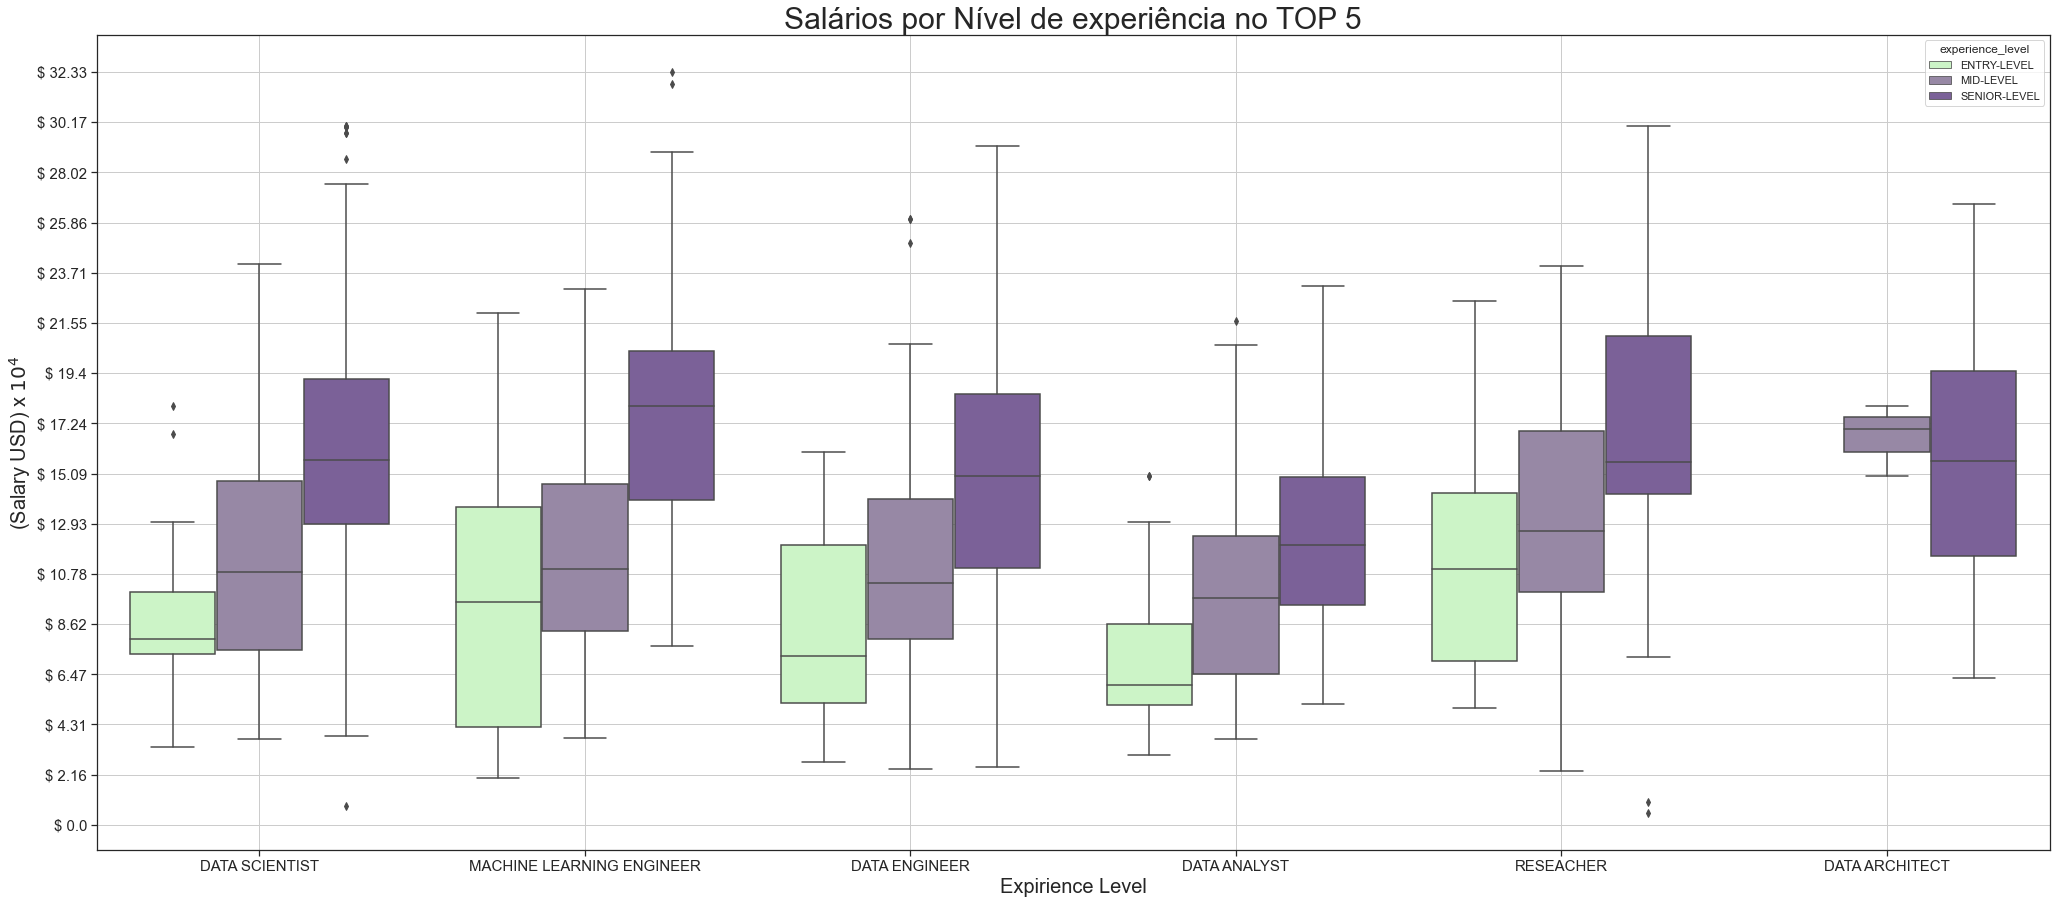

In [91]:
range_sals_lvl_exp = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['experience_level'] != 'EXPIRIENCED'].sort_values('experience_level')


rescaled = range_sals_lvl_exp.copy()


power= 4
scaling = 10**power
rescaled['salary_in_usd'] = rescaled['salary_in_usd'] / scaling

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
fig= plt.figure(figsize=(35,15))
tips = sns.load_dataset("tips")
expirience_color_pallete= ['#c6fbc0','#9783aa','#7b58a1','#393f8c']
# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="job_title", y="salary_in_usd",
            hue="experience_level", palette=expirience_color_pallete,
            data=rescaled)
#sns.despine(offset=5, trim=True)




plt.title('Range salary  on top 5 world per job Role', fontsize=25)

plt.ylabel(f"(Salary USD) x $10^{power}$", fontsize=20)
plt.xlabel("Job Role", fontsize=20)
plt.xticks( fontsize=15)


max_sal = rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 15
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal], fontsize=15)




ax.set_xlabel("Expirience Level", fontsize=20)
# Set the title
ax.set_title('Salários por Nível de experiência no TOP 5', fontsize=30)

plt.grid()

## Faixa de salário por nível de experiência

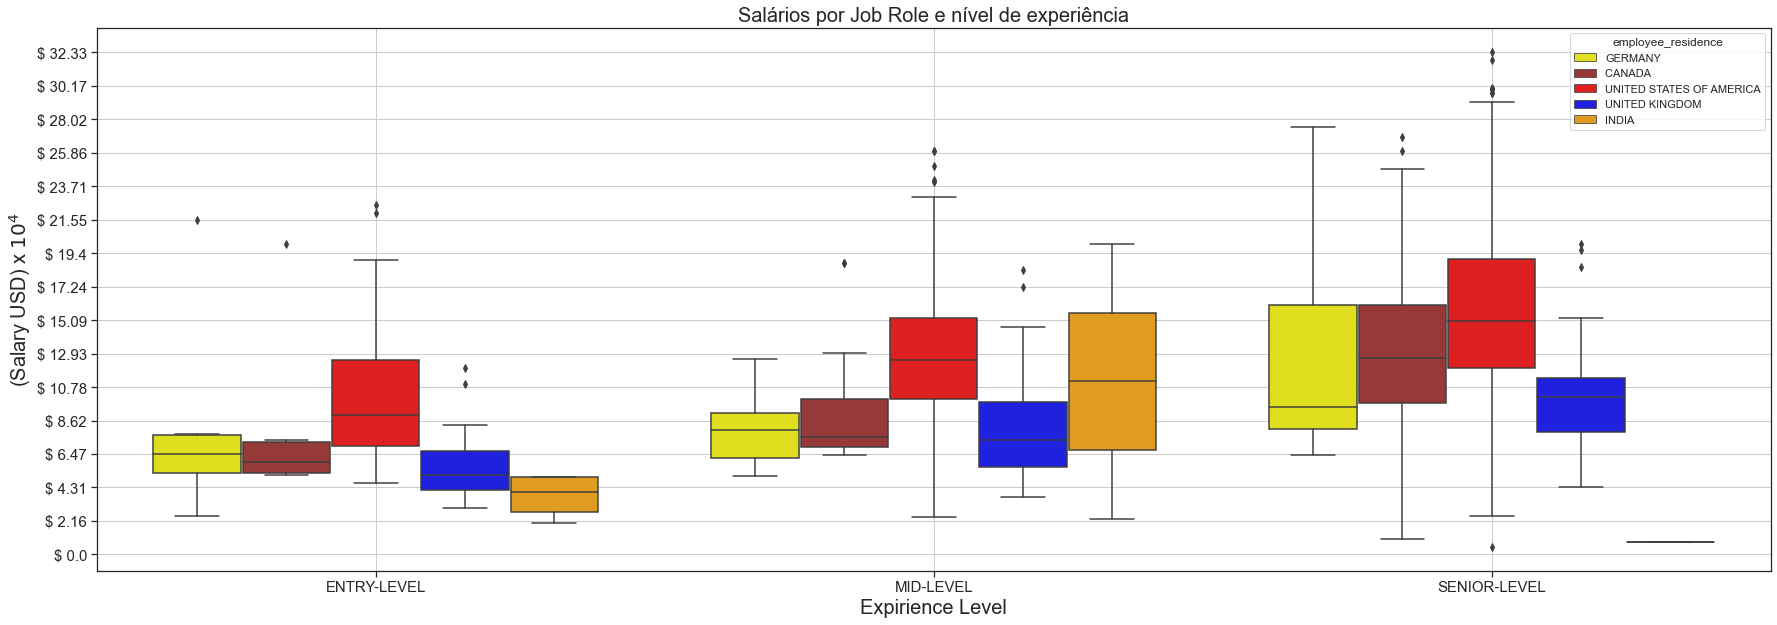

In [92]:
import seaborn as sns

range_sals_lvl_exp = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['experience_level'] != 'EXPIRIENCED'].sort_values('experience_level')


rescaled = range_sals_lvl_exp.copy()


power= 4
scaling = 10**power
rescaled['salary_in_usd'] = rescaled['salary_in_usd'] / scaling

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
fig= plt.figure(figsize=(30,10))
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="experience_level", y="salary_in_usd",
            hue="employee_residence", palette=["yellow","brown","red",'blue','orange'],
            data=rescaled)
#sns.despine(offset=5, trim=True)




plt.title('Range salary  on top 5 world per job Role', fontsize=25)

plt.ylabel(f"(Salary USD) x $10^{power}$", fontsize=20)
plt.xlabel("Job Role", fontsize=20)
plt.xticks( fontsize=15)


max_sal = rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 15
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal], fontsize=15)




ax.set_xlabel("Expirience Level", fontsize=20)
# Set the title
ax.set_title('Salários por Job Role e nível de experiência', fontsize=20)

plt.grid()

## Faixa de salário por Job Role

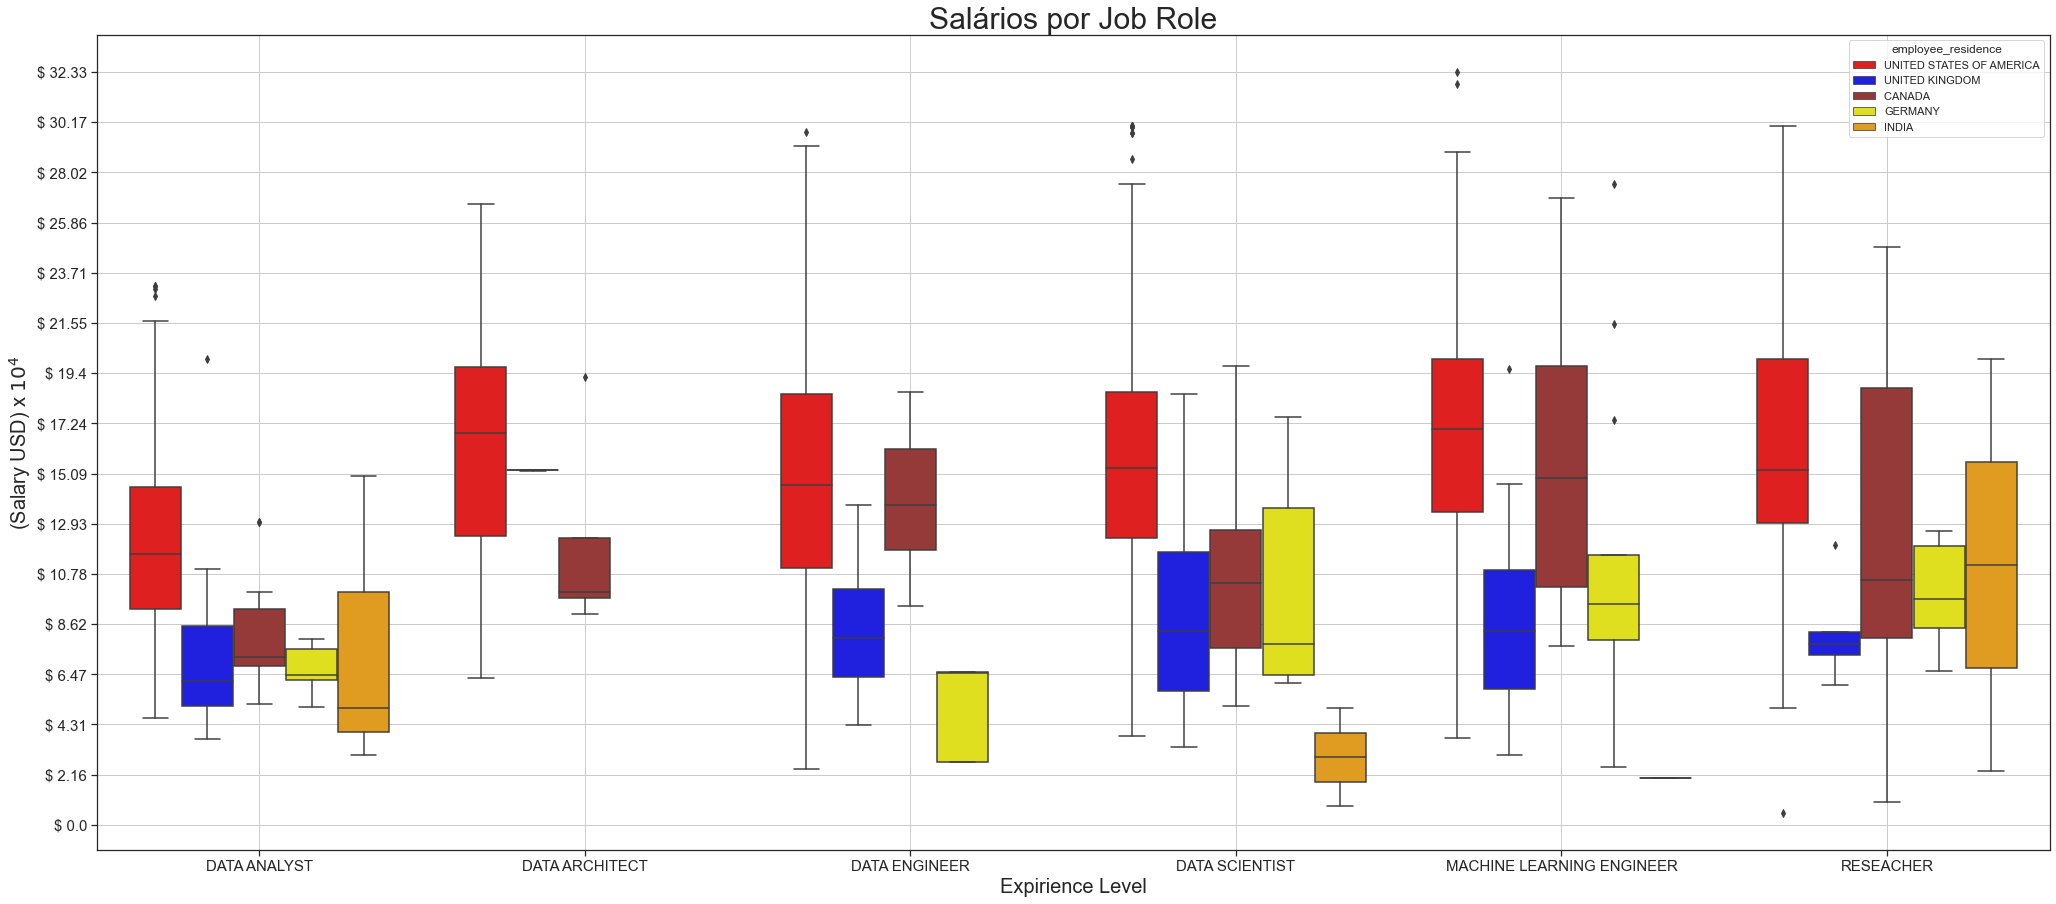

In [93]:
range_sals_lvl_exp = salaries_world_around_df_preprocessed.sort_values('job_title')


rescaled = range_sals_lvl_exp.copy()


power= 4
scaling = 10**power
rescaled['salary_in_usd'] = rescaled['salary_in_usd'] / scaling

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
fig= plt.figure(figsize=(35,15))
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="job_title", y="salary_in_usd",
            hue="employee_residence", palette=["red","blue","brown",'yellow','orange'],
            data=rescaled)
#sns.despine(offset=5, trim=True)




plt.title('Range salary  on top 5 world per job Role', fontsize=25)

plt.ylabel(f"(Salary USD) x $10^{power}$", fontsize=20)
plt.xlabel("Job Role", fontsize=20)
plt.xticks( fontsize=15)


max_sal = rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 15
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal], fontsize=15)




ax.set_xlabel("Expirience Level", fontsize=20)
# Set the title
ax.set_title('Salários por Job Role', fontsize=30)

plt.grid()

faixa de salári

In [94]:
h1bdata_df_preprocessed

,company,title,salary,date,date_str,city,state
0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,45980.0,2020-04-09,09/04/2020,ORLANDO,FL
1,PERCOLATA CORPORATION,DATA SCIENTIST,46060.0,2016-03-18,18/03/2016,PALO ALTO,CA
2,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,2015-02-18,18/02/2015,FORT LEE,NJ
3,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,2015-02-18,18/02/2015,FORT LEE,NJ
4,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,50000.0,2017-03-16,16/03/2017,JOHNS CREEK,GA
...,...,...,...,...,...,...,...
82389,TECHDATA SERVICE COMPANY LLC,STATISTICIAN,135000.0,2022-08-27,27/08/2022,SOMERSET,NJ
82390,TECHDATA SERVICE COMPANY LLC,STATISTICIAN,135000.0,2022-08-26,26/08/2022,SOMERSET,NJ
82391,WELLS FARGO SECURITIES LLC,STATISTICIAN,135000.0,2015-10-26,26/10/2015,CHARLOTTE,NC
82392,ARION CAPITAL MANAGEMENT LLC,STATISTICIAN,135000.0,2019-03-13,13/03/2019,BENSALEM,PA


# Um zoom nos EUA

De acordo com a análise feita no TOP 5 ficou bem percebiptível que tanto na média quanto na faixa de valores os EUA é o país que melhor bem paga os profissionais de Data Science. Por isso vale a pena olha com um pouco mai de detalhe esse país e descobrir tendências globais, dado a forte influência que esse o país possuil, incluisive pelo fato de ter sido o pioneiro a introduzir o conceito Data science.

# Médias de salários nos Estado unidos por Job role e nível de experiência

In [95]:
salaries_on_EUA  = salaries_world_around_df_preprocessed[salaries_world_around_df_preprocessed['employee_residence'] == 'UNITED STATES OF AMERICA'][['experience_level','job_title','salary_in_usd']]
group_by_exp_level_EUA = salaries_on_EUA.groupby(['job_title', 'experience_level']).mean('salary_in_usd').reset_index()


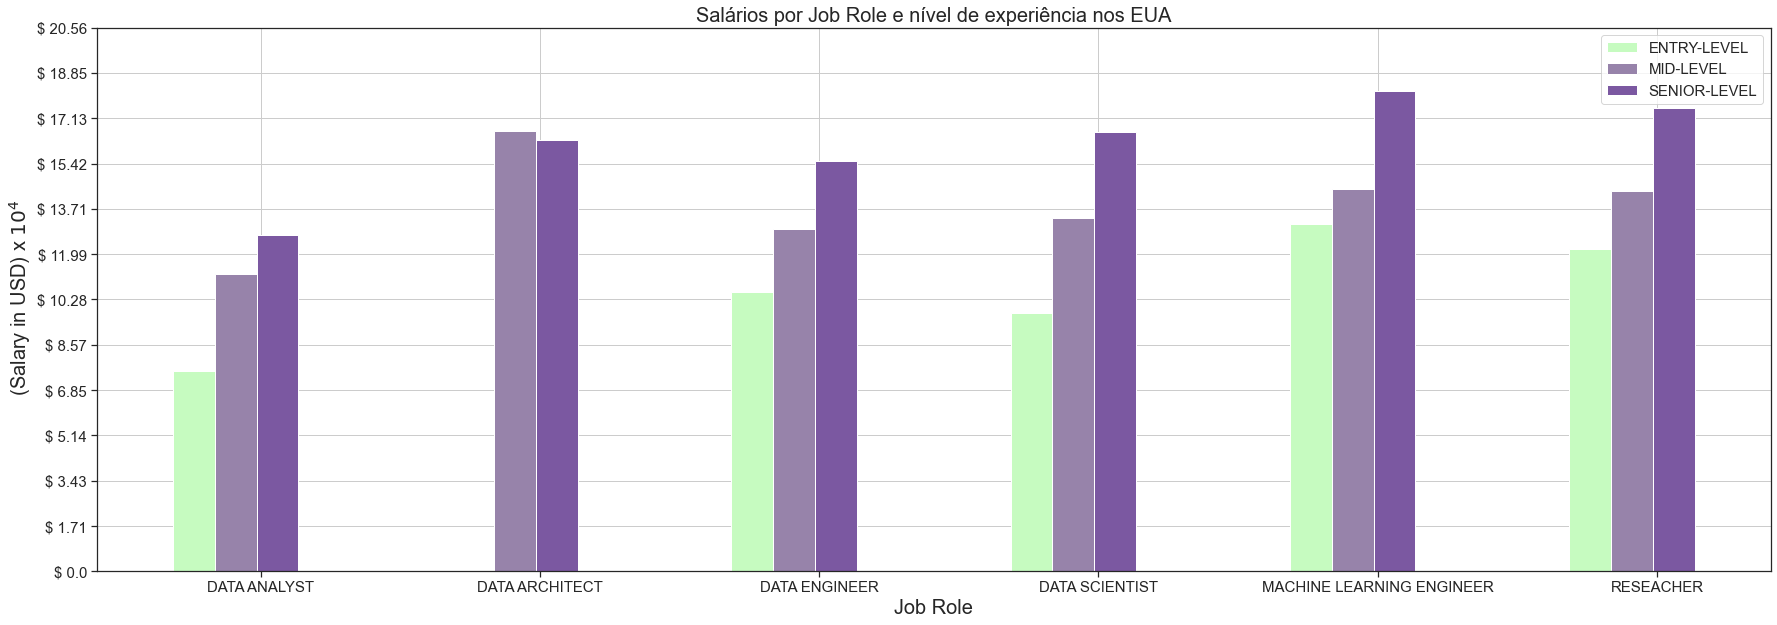

In [96]:
power= 4
scaling = 10**power

group_by_exp_level_EUA_rescaled = group_by_exp_level_EUA.copy()
group_by_exp_level_EUA_rescaled['salary_in_usd'] = group_by_exp_level_EUA_rescaled['salary_in_usd']/scaling


categories = salaries_world_around_df_preprocessed['job_title'].sort_values(ascending=True).unique()
seniors_sals =   [ round(el,2 ) for el in list( group_by_exp_level_EUA_rescaled[ group_by_exp_level_EUA_rescaled['experience_level'] == 'SENIOR-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]
mid_level_sals =  [ round(el,2 ) for el in list( group_by_exp_level_EUA_rescaled[ group_by_exp_level_EUA_rescaled['experience_level'] == 'MID-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]






#Já aqui só falta para Data Architect
entry_sals = [ round(el,2 ) for el in  list( group_by_exp_level_EUA_rescaled[ group_by_exp_level_EUA_rescaled['experience_level'] == 'ENTRY-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd']) ] 
entry_sals.insert(1, 0.0)





exp_levels_sals = [entry_sals, mid_level_sals, seniors_sals  ]


# Set up the figure
fig, ax = plt.subplots(figsize=(30,10))

# Set the width of each bar
bar_width = 0.15
# Set the x positions of the bars
x_pos = np.arange(len(categories))


# Plot the bars
expirience_color_pallete= ['#c6fbc0','#9783aa','#7b58a1','#393f8c']

for i in range(0,len(exp_levels_sals)):
    
    exp_level_sal = exp_levels_sals[i]
    
    job_roles = group_by_exp_level_EUA_rescaled['job_title'].unique()     
        

    if i ==0 :
        ax.bar(x_pos+i*bar_width   , exp_level_sal, width=bar_width, color=expirience_color_pallete[i], align='center')
    
    else:
        ax.bar(x_pos+i*bar_width  , exp_level_sal, width=bar_width, color=expirience_color_pallete[i], align='center')
    
# Set the x-axis labels and tick positions
ax.set_xticks(x_pos + bar_width + 0.09)
ax.set_xticklabels(categories, fontsize=15)

# Set the y-axis label
ax.set_ylabel(f' (Salary in USD) x $10^{power}$', fontsize= 20)



max_sal = group_by_exp_level_EUA_rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 12
step = (max_sal - min_sal)/n_ticks

range_sal = np.arange(min_sal, max_sal + step, step)


ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal], fontsize=15)




ax.set_xlabel("Job Role", fontsize=20)
# Set the title
ax.set_title('Salários por Job Role e nível de experiência nos EUA', fontsize=20)

# Add a legend]
ax.legend(['ENTRY-LEVEL','MID-LEVEL','SENIOR-LEVEL'], fontsize=15)

# Show the plot

plt.grid()

In [97]:
range_sal

array([ 0.        ,  1.71324653,  3.42649306,  5.13973958,  6.85298611,
        8.56623264, 10.27947917, 11.99272569, 13.70597222, 15.41921875,
       17.13246528, 18.84571181, 20.55895833])

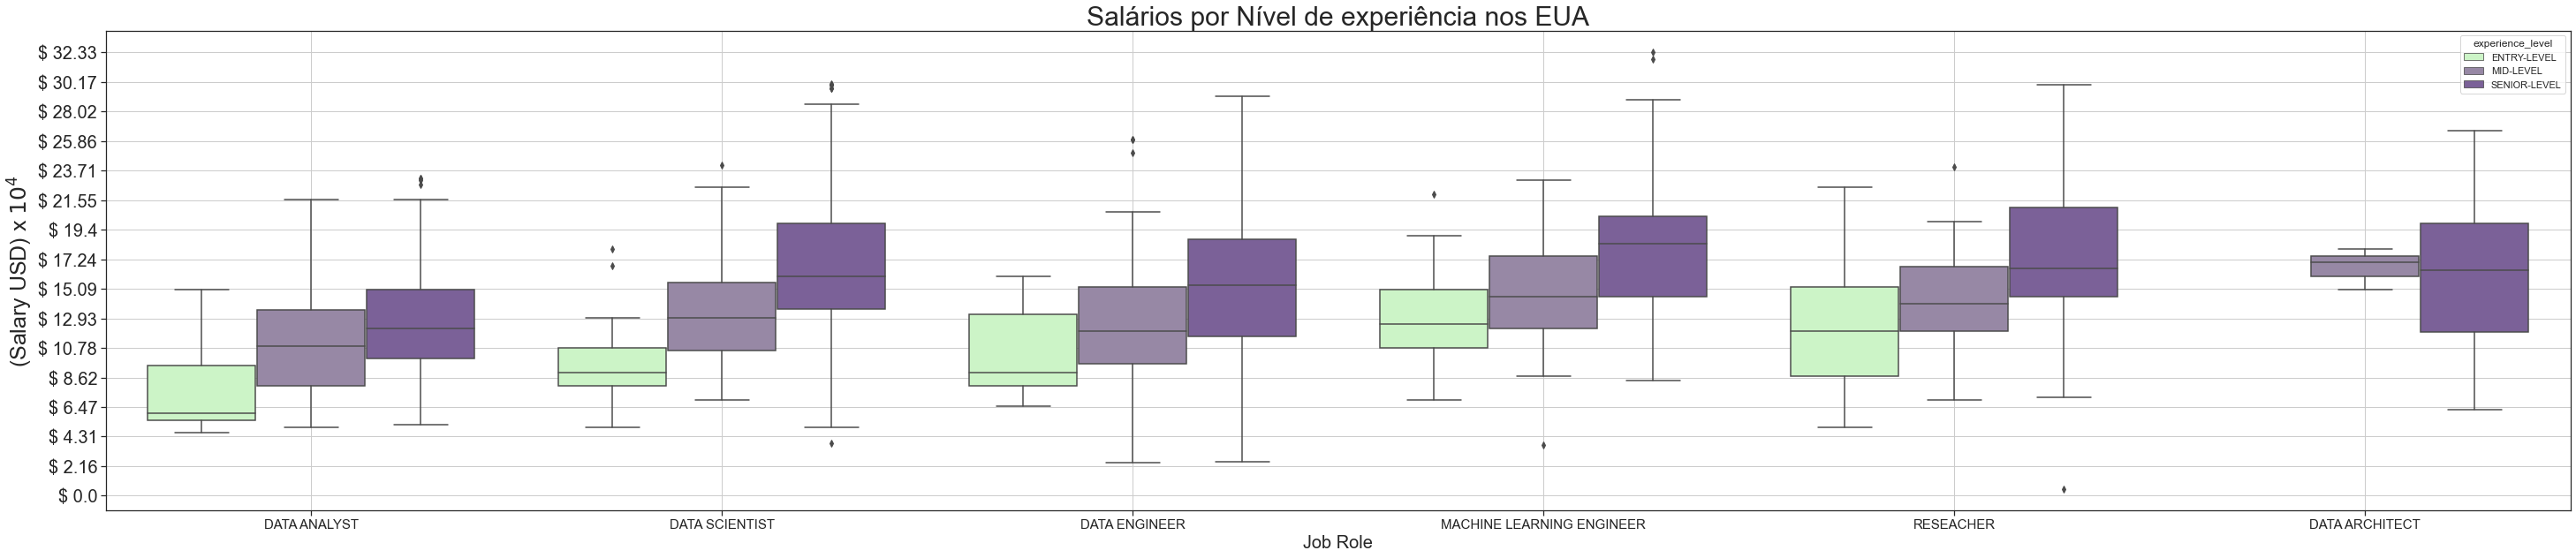

In [98]:
salaries_on_EUA  = salaries_world_around_df_preprocessed[salaries_world_around_df_preprocessed['employee_residence'] == 'UNITED STATES OF AMERICA'].sort_values('experience_level')
salaries_on_EUA = salaries_on_EUA[ salaries_on_EUA['experience_level'] != 'EXPIRIENCED' ]

rescaled = salaries_on_EUA.copy()


power= 4
scaling = 10**power
rescaled['salary_in_usd'] = rescaled['salary_in_usd'] / scaling

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
fig= plt.figure(figsize=(50,10))
tips = sns.load_dataset("tips")
expirience_color_pallete= ['#c6fbc0','#9783aa','#7b58a1','#393f8c']
# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="job_title", y="salary_in_usd",
            hue="experience_level", palette=expirience_color_pallete,
            data=rescaled)
#sns.despine(offset=5, trim=True)






plt.ylabel(f"(Salary USD) x $10^{power}$", fontsize=25)
plt.xlabel("Job Role", fontsize=20)
plt.xticks( fontsize=15)


max_sal = rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 15
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal], fontsize=20)



# Set the title
ax.set_title('Salários por Nível de experiência nos EUA', fontsize=30)

plt.grid()

# Evolução de salários nos EUA

In [116]:
salaries_ds_eua_over_time = h1bdata_df_preprocessed[['date','date_str','title','salary']].groupby(['date','date_str','title']).mean().reset_index().sort_values('date',ascending=True)
salaries_ds_eua_over_time

,date,date_str,title,salary
0,2011-10-17,17/10/2011,BUSINESS ANALYST,53000.000000
1,2012-02-15,15/02/2012,DATA ANALYST,60000.000000
2,2012-04-03,03/04/2012,DATA ANALYST,62000.000000
3,2012-04-12,12/04/2012,BUSINESS ANALYST,45926.000000
4,2012-09-18,18/09/2012,BUSINESS ANALYST,77251.000000
...,...,...,...,...
10306,2022-12-22,22/12/2022,DATA ARCHITECT,180000.000000
10307,2022-12-22,22/12/2022,DATA ENGINEER,115319.500000
10304,2022-12-22,22/12/2022,BUSINESS ANALYST,77272.166667
10305,2022-12-22,22/12/2022,DATA ANALYST,89831.500000


## Tendência Geral

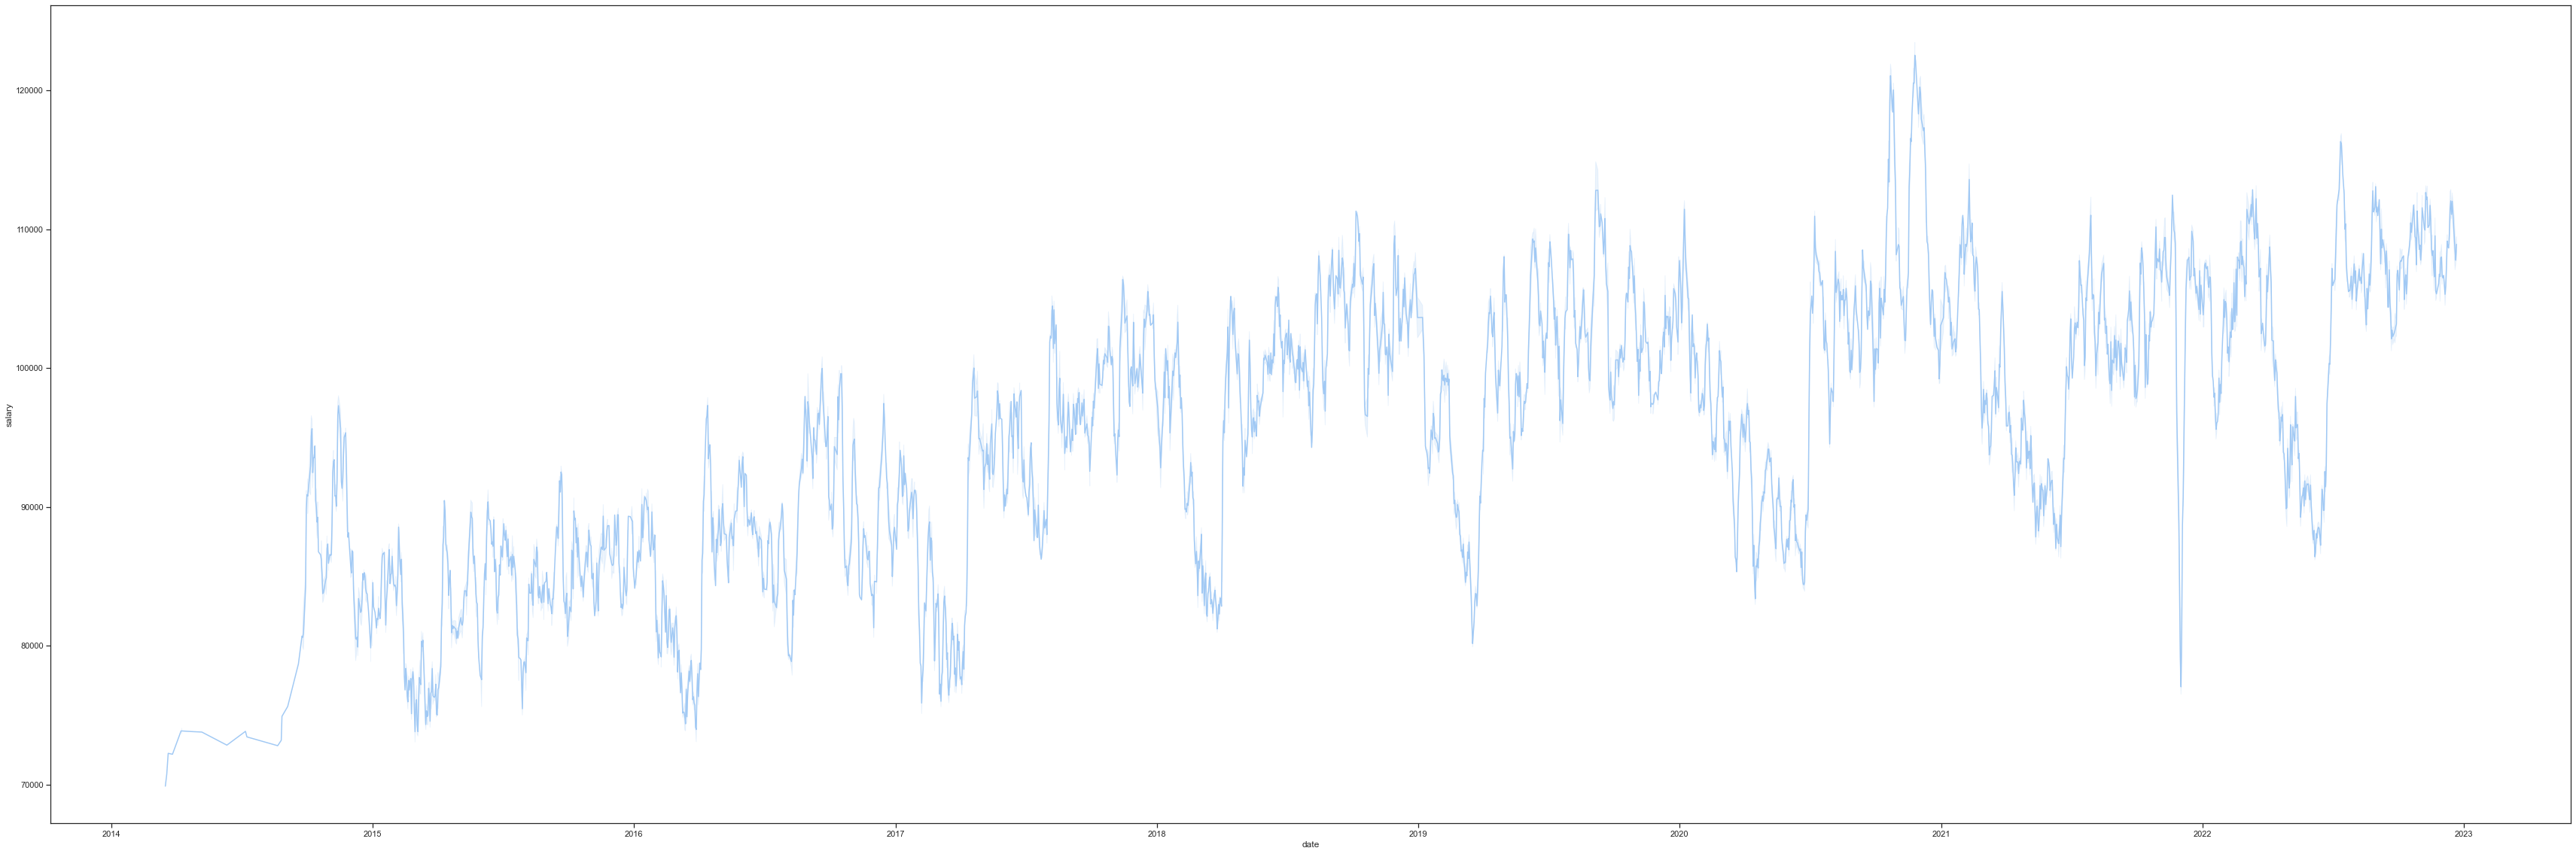

In [122]:

plt.figure(figsize = (60,20))
sal_mov_mean = salaries_ds_eua_over_time['salary'].rolling(window=30).mean()
sns.lineplot(data=salaries_ds_eua_over_time, x='date', y=sal_mov_mean)

n_ticks = 20
max_val = len(salaries_ds_eua_over_time)
step = max_val/nticks
x_ticks = np.arange(0, max_val + step, step)
#ax.set_xticks(x_ticks)
#ax.set_ticklabels()

## Por Job Role

In [157]:
salaries_ds_eua_over_time

,date,date_str,title,salary
0,2011-10-17,17/10/2011,BUSINESS ANALYST,53000.000000
1,2012-02-15,15/02/2012,DATA ANALYST,60000.000000
2,2012-04-03,03/04/2012,DATA ANALYST,62000.000000
3,2012-04-12,12/04/2012,BUSINESS ANALYST,45926.000000
4,2012-09-18,18/09/2012,BUSINESS ANALYST,77251.000000
...,...,...,...,...
10306,2022-12-22,22/12/2022,DATA ARCHITECT,180000.000000
10307,2022-12-22,22/12/2022,DATA ENGINEER,115319.500000
10304,2022-12-22,22/12/2022,BUSINESS ANALYST,77272.166667
10305,2022-12-22,22/12/2022,DATA ANALYST,89831.500000


,salary
0,NaN
3,NaN
4,NaN
5,NaN
8,NaN
10,NaN
11,NaN
13,NaN
14,NaN
15,NaN


[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
[Text(0, 0, ''), T

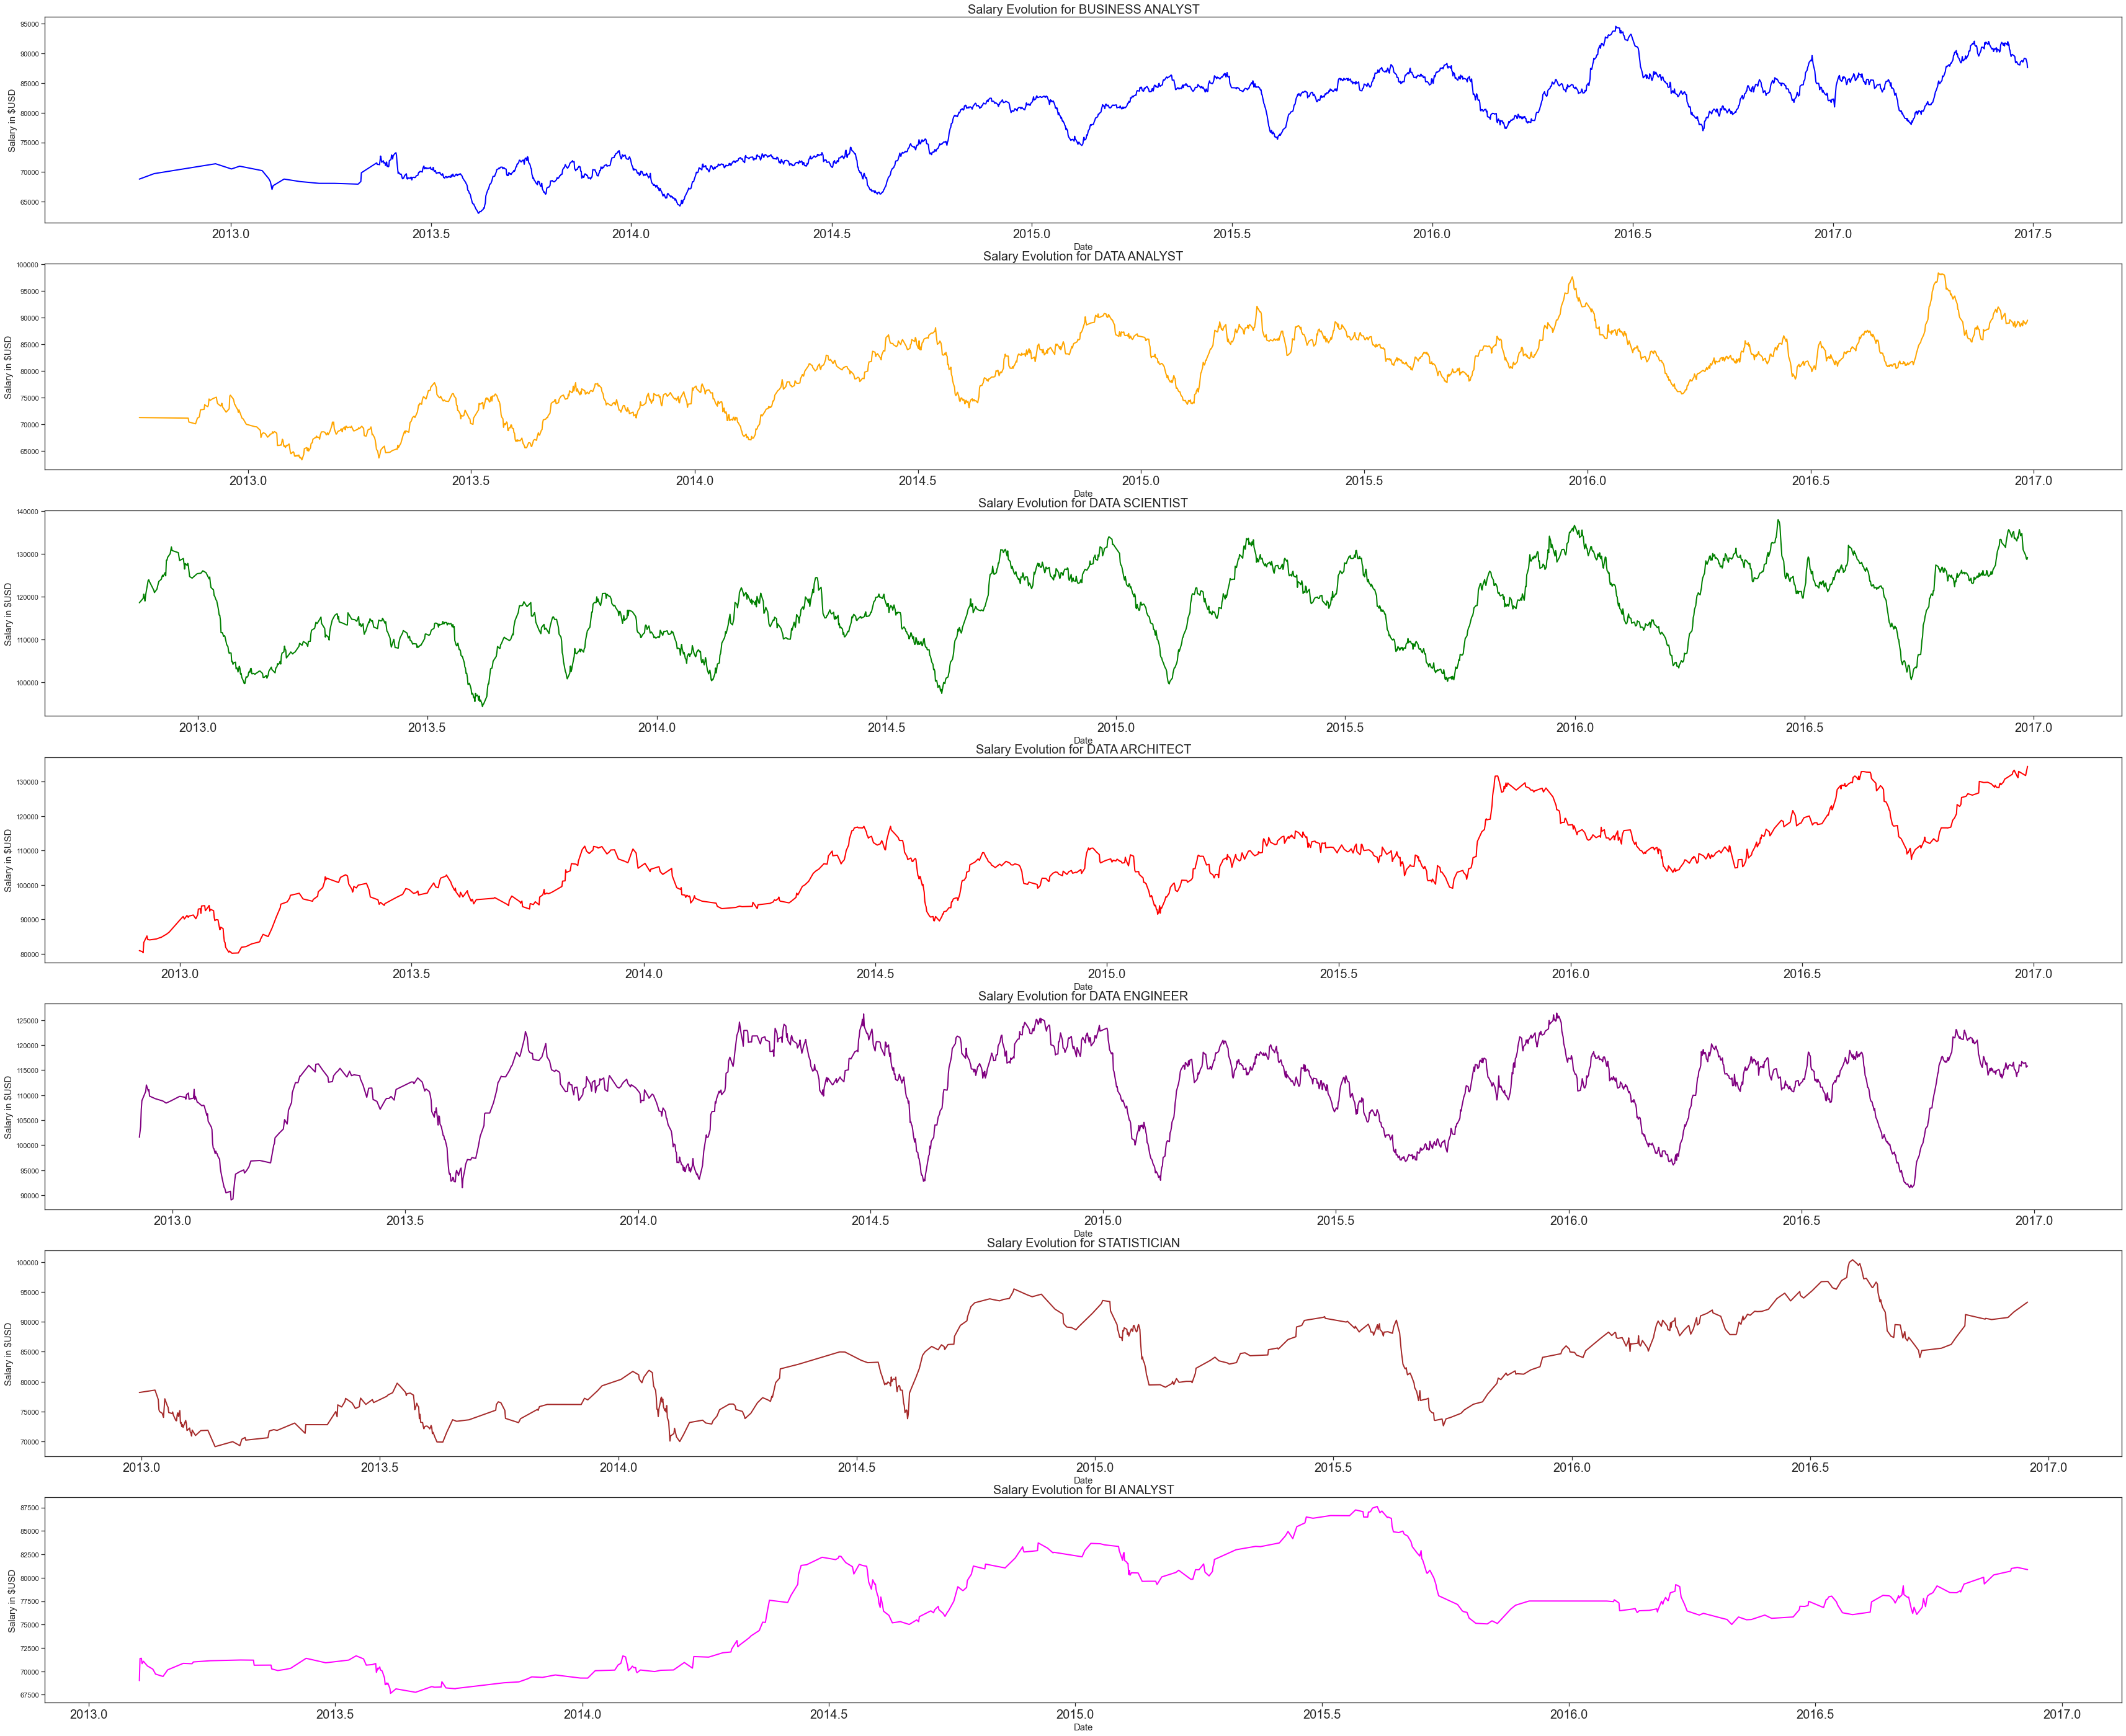

In [227]:
ds_jobs =salaries_ds_eua_over_time['title'].unique()
fig, axs = plt.subplots(nrows=len(ds_jobs) ,figsize = (60,50))


for (i,job) in zip( range(0, len(ds_jobs)) , ds_jobs ):
    sal_mov_mean =  salaries_ds_eua_over_time.copy()
    sal_mov_mean['salary'] =  salaries_ds_eua_over_time[['salary']][salaries_ds_eua_over_time['title'] == job].rolling(window=30,min_periods=10).mean()
    
    ax1 = sns.lineplot(data=sal_mov_mean,x='date', y='salary', ax = axs[i] , linewidth=2, legend=False, color = JOB_COLORS[i])
    
    axs[i].set_xlabel("Date", fontsize=15)
    axs[i].set_ylabel("Salary in $USD", fontsize=15)
    axs[i].set_title(f'Salary Evolution for {job}', fontsize=20)
    
    print(ax1.get_xticklabels() )
    #axs[i].set_xticks([el for el in np.arange(2011,202)])
    axs[i].set_xticklabels([str(el) for el in np.arange(2012.5,2024,0.5)],fontsize=20)
   # axs[i].set_legend(f"Salary over time for {job}")
   


n_ticks = 20
max_val = len(salaries_ds_eua_over_time)
step = max_val/nticks
x_ticks = np.arange(0, max_val + step, step)

In [117]:
n_ticks = 20
max_val = len(salaries_ds_eua_over_time)
step = max_val/nticks
x_ticks =np.int64( np.arange(0, max_val , step) )
x_tickslabels = [str(salaries_ds_eua_over_time['date_str'].iloc[i]) for i in x_ticks ]
x_tickslabels

['17/10/2011',
 '11/05/2015',
 '11/02/2016',
 '20/09/2016',
 '21/04/2017',
 '12/12/2017',
 '06/06/2018',
 '09/01/2019',
 '25/06/2019',
 '17/01/2020',
 '18/06/2020',
 '11/01/2021',
 '21/06/2021',
 '23/12/2021',
 '07/06/2022']

In [214]:

salaries_ds_eua_over_time[['salart']] = salaries_ds_eua_over_time[['salary']][salaries_ds_eua_over_time['title'] == 'DATA SCIENTIST'].rolling(window=3, min_periods=10).mean()
salaries_ds_eua_over_time

ValueError: min_periods 10 must be <= window 3

In [209]:
salaries_ds_eua_over_time

,date,date_str,title,salary
0,2011-10-17,17/10/2011,BUSINESS ANALYST,53000.000000
1,2012-02-15,15/02/2012,DATA ANALYST,60000.000000
2,2012-04-03,03/04/2012,DATA ANALYST,62000.000000
3,2012-04-12,12/04/2012,BUSINESS ANALYST,45926.000000
4,2012-09-18,18/09/2012,BUSINESS ANALYST,77251.000000
...,...,...,...,...
10306,2022-12-22,22/12/2022,DATA ARCHITECT,180000.000000
10307,2022-12-22,22/12/2022,DATA ENGINEER,115319.500000
10304,2022-12-22,22/12/2022,BUSINESS ANALYST,77272.166667
10305,2022-12-22,22/12/2022,DATA ANALYST,89831.500000
